# Declaration of Originality

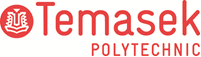

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : STA ANA ELISHA GABRIELLE BENEDICTO (2404671F)
* Tutorial Group                : PC05
* Tutor						    : KIAN ENG ONG
* Submission Date               : 11 FEB 2026

**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [2]:
## Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 1. Business Understanding
#### Business Understanding:
Banks frequently run term deposit marketing campaigns, but most customers contacted do not end up subscribing, leading to high outreach costs and inefficient use of marketing resources. To address this issue, this project aims to build a supervised machine learning classification model that predicts whether a customer will subscribe to a term deposit (Yes or No). By identifying customers with a higher likelihood of subscription, marketing teams can prioritise high-potential customers, improve campaign conversion rates, and reduce unnecessary marketing calls. This problem is formulated as a binary classification task because the outcome consists of two possible categories. The primary users of this model are bank marketing staff, who can use the predictions as decision support when planning and executing marketing campaigns.

#### Goal: 
The goal of this project is to develop a supervised machine learning classification model that predicts whether a bank customer will subscribe to a term deposit, enabling more targeted marketing and reduced unnecessary marketing costs

# 2. Data Understanding


## Dataset Explanation

This project uses the UCI Bank Marketing dataset, which contains information collected from direct marketing campaigns conducted by a Portuguese bank. Each record in the dataset represents a customer who was contacted via phone during a marketing campaign for a term deposit product. The dataset consists of 45,211 customer records with structured tabular data, making it suitable for supervised machine learning analysis.

The dataset includes a mix of customer demographic attributes, financial information, and campaign-related variables. Customer attributes such as age, job type, marital status, and education provide background information about the customer. Financial variables such as account balance, housing loan, and personal loan reflect the customer’s financial situation, which may influence their willingness to commit funds to a term deposit.

In addition, the dataset contains campaign interaction features such as the number of contacts made, the duration of the last call, and the outcome of previous marketing campaigns. These variables capture customer engagement and responsiveness to marketing efforts, which are important indicators of potential subscription behaviour. Contextual features such as the month and day of contact provide additional timing-related information.

The target variable in this dataset is `y`, which indicates whether the customer subscribed to a term deposit after the marketing campaign (yes or no). As the outcome has two possible categories, this problem is formulated as a binary classification task. Overall, this dataset is well-suited for predicting customer subscription behaviour and supports the project objective of improving marketing efficiency through data-driven decision-making.


## 2.1 Load dataset

In [3]:
df = pd.read_excel("bank-full.xlsx")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Dataset Columns and Descriptions

| Column Name | Description |
|------------|-------------|
| age | Age of the customer |
| job | Type of job held by the customer |
| marital | Marital status of the customer |
| education | Highest education level attained by the customer |
| default | Whether the customer has credit in default |
| balance | Average yearly account balance (in euros) |
| housing | Whether the customer has a housing loan |
| loan | Whether the customer has a personal loan |
| contact | Type of contact communication used |
| day | Day of the month when the customer was last contacted |
| month | Month when the customer was last contacted |
| duration | Duration of the last contact call (in seconds) |
| campaign | Number of contacts performed during the current campaign |
| pdays | Number of days since the customer was last contacted in a previous campaign (-1 means not previously contacted) |
| previous | Number of contacts performed before the current campaign |
| poutcome | Outcome of the previous marketing campaign |
| y | Target variable indicating whether the customer subscribed to a term deposit (yes or no) |


## 2.2 Summary Statistics


In [4]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


((45211, 17), None)

In [5]:
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000



An initial exploration of the dataset was conducted using `df.shape`, `df.info()`, `df.isnull().sum()`, and `df.describe()` to understand its structure, data quality, and statistical characteristics prior to modelling. The dataset contains 45,211 customer records and 17 columns, comprising 16 input features and one categorical target variable (`y`) that indicates whether a customer subscribed to a term deposit. The features include a combination of numerical variables (such as age, account balance, campaign duration, and number of contacts) and categorical variables (such as job type, education level, housing loan status, and previous campaign outcome), confirming that the dataset is appropriate for a supervised binary classification task.

A missing value assessment shows that there are no null (NaN) values across all columns, indicating that the dataset is complete and does not require missing value imputation. However, several categorical variables contain the value `"unknown"`, which represents unrecorded information rather than missing data. These values carry semantic meaning and will be handled explicitly during preprocessing instead of being treated as null entries.

Descriptive statistics of the numerical features reveal several important patterns. The age variable falls within a reasonable range, indicating broad coverage of the working-age population. In contrast, financial variables such as account balance and campaign-related features such as call duration and number of contacts exhibit wide variability and strong skewness. This suggests the presence of outliers and heterogeneous customer behaviours, which may influence model performance and motivate the use of appropriate feature scaling or robust algorithms.

In addition, the distribution of the target variable is highly imbalanced, with a significantly larger proportion of customers not subscribing compared to those who do. This highlights the limitation of accuracy as a sole evaluation metric and motivates the use of alternative metrics that better capture the model’s ability to identify potential subscribers. Overall, this analysis confirms that the dataset is clean, well-structured, and suitable for further exploratory data analysis and machine learning modelling.


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [7]:
df['y'].value_counts()



y
no     39922
yes     5289
Name: count, dtype: int64

In [8]:
df["y"].value_counts(normalize=True) * 100

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64

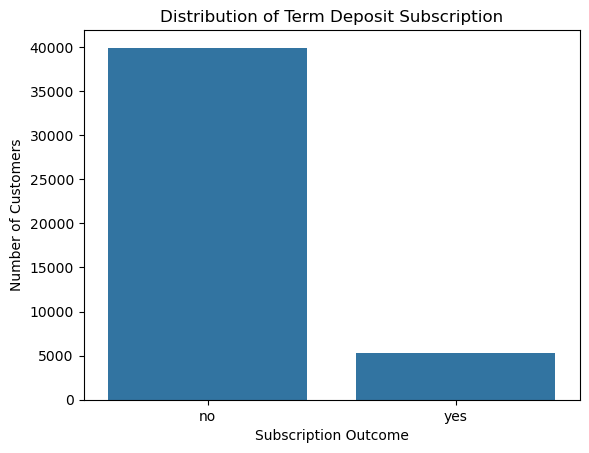

In [9]:
sns.countplot(x="y", data=df)
plt.title("Distribution of Term Deposit Subscription")
plt.xlabel("Subscription Outcome")
plt.ylabel("Number of Customers")
plt.show()

The target variable `y` represents whether a customer subscribed to a term deposit, with two possible outcomes: **yes** and **no**. As shown in the count plot, the bar representing **no** is significantly taller than the bar representing **yes**, clearly indicating a strong class imbalance in the dataset. Specifically, out of **45,211 customers**, **39,922 customers (approximately 88.3%) did not subscribe**, while only **5,289 customers (approximately 11.7%) subscribed** to the term deposit. These values are directly reflected in the plot, where the **no** category dominates the distribution.

This distribution indicates that the majority of customers contacted during the marketing campaigns chose not to subscribe, reflecting real-world marketing behaviour where successful conversions are relatively rare. As a result, a model trained on this data may become biased toward predicting the majority class (**no**) if class imbalance is not carefully considered, leading to misleadingly high accuracy but poor identification of actual subscribers.

Due to this imbalance, evaluation metrics such as **precision, recall, and F1-score** are more appropriate than accuracy alone, as they better capture the model’s ability to identify potential subscribers. In addition, preserving class proportions during train–test splitting and analysing class-wise performance will be important to ensure reliable and meaningful model evaluation.


### 2.3.1.2 Understanding distribution of features

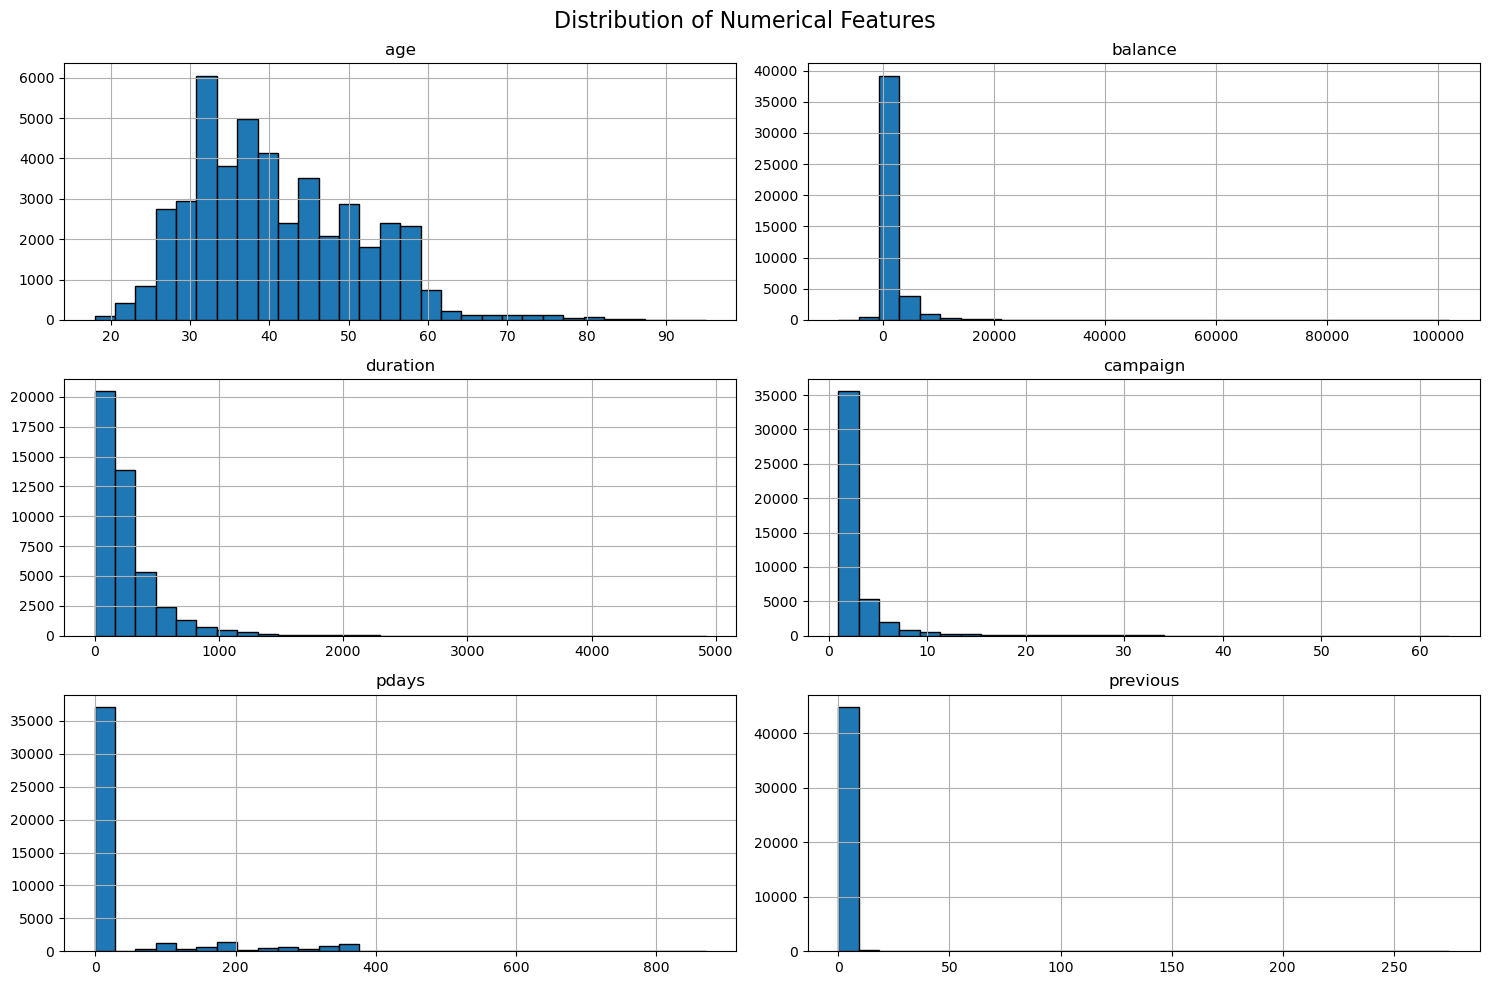

In [10]:
numerical_features = ["age", "balance", "duration", "campaign", "pdays", "previous"]

df[numerical_features].hist(
    figsize=(15, 10),
    bins=30,
    edgecolor="black"
)

plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


The numerical features analysed include **age**, **account balance**, **call duration**, **number of contacts during the current campaign (`campaign`)**, **days since last contact in a previous campaign (`pdays`)**, and **number of previous contacts (`previous`)**. Histograms were used to examine the distribution of these variables and to identify skewness, concentration ranges, and the presence of extreme values.

From the age distribution, most customers fall between approximately **30 and 50 years old**, with the highest frequency observed around the mid-30s to early-40s. Very few customers are younger than **25** or older than **70**, indicating that the dataset largely represents a working-age population rather than very young or elderly customers.

The balance feature is heavily right-skewed. The majority of customers have account balances clustered close to **0**, with many values slightly negative or only a few thousand euros. However, the histogram shows a small number of extreme outliers, with balances extending beyond **20,000** and reaching close to **100,000**. This large spread demonstrates significant inequality in customer account balances and confirms the presence of extreme values that could disproportionately influence models sensitive to scale.

Call duration also exhibits strong right skewness. Most calls last under **300 seconds**, with the highest concentration occurring below **200 seconds**. A small number of calls extend well beyond **1,000 seconds**, with rare cases approaching **5,000 seconds**. These long calls are uncommon but potentially important, as they may represent highly engaged customers.

For the `campaign` feature, the majority of customers were contacted only **1 to 3 times** during the current campaign. Frequencies drop sharply after this range, although a long tail is present with some customers contacted more than **10 times**, and a few extreme cases exceeding **50 contacts**. This suggests diminishing returns from repeated contact and highlights potential customer fatigue.

The `pdays` distribution is dominated by a large spike at **-1**, indicating that a substantial portion of customers were **not contacted in any previous campaign**. Apart from this spike, most remaining values are below **200 days**, with a smaller number of cases extending toward **900 days**, showing wide variation in how recently customers were last contacted.

Similarly, the `previous` feature is highly concentrated at **0**, meaning most customers had **no prior contacts** before the current campaign. Only a small proportion of customers had more than **5 previous contacts**, and very few exceeded **50**, confirming that repeated historical contact is relatively rare.

Overall, the numerical feature distributions show clear evidence of skewness and extreme values, particularly for **balance**, **duration**, **campaign**, `pdays`, and `previous`. These characteristics highlight the importance of appropriate preprocessing and justify the use of models that can handle non-normal distributions and outliers effectively, such as tree-based methods or models robust to skewed inputs.


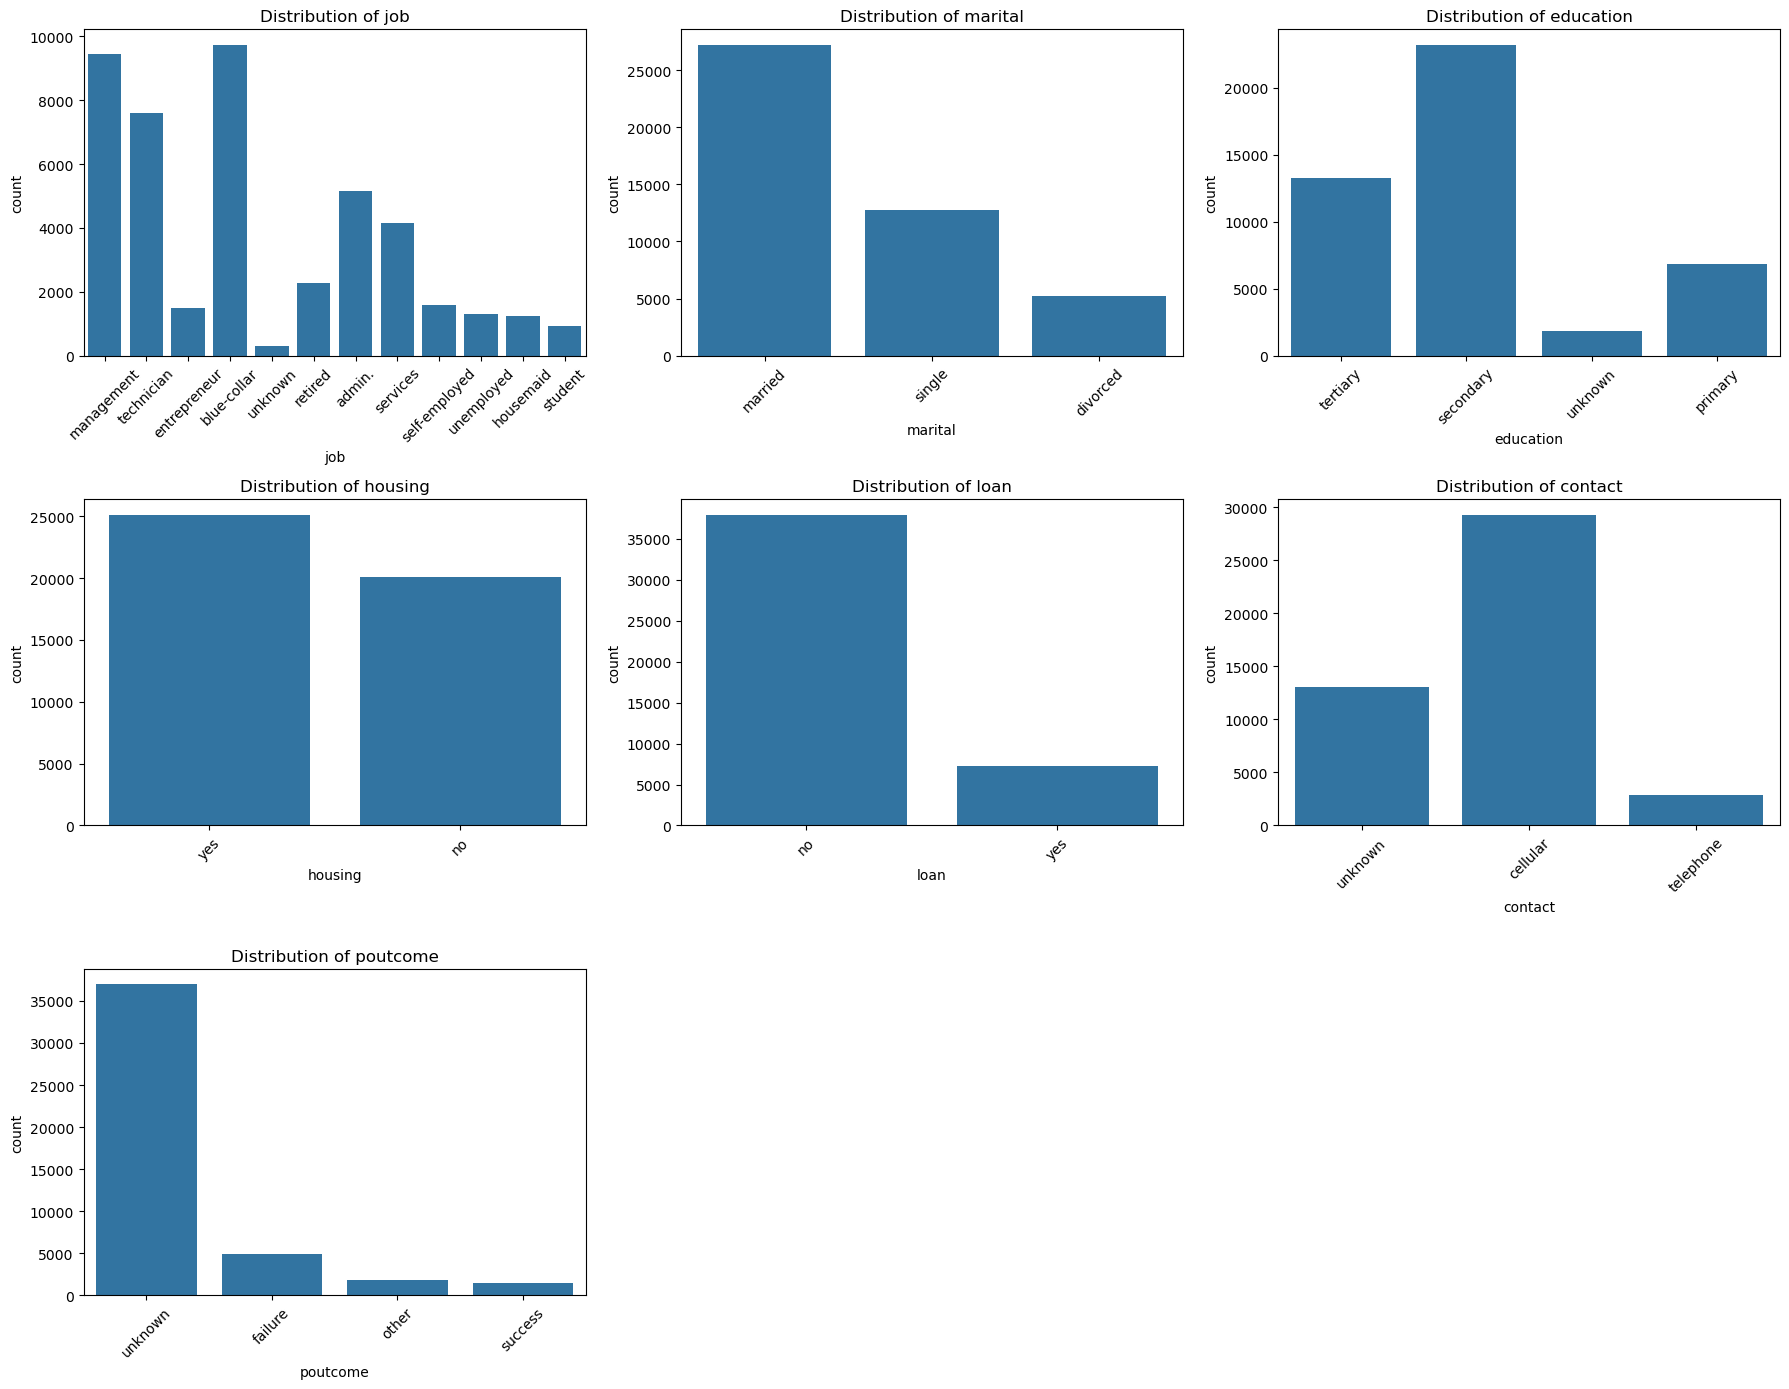

In [11]:
categorical_features = ["job", "marital", "education", "housing", "loan", "contact", "poutcome"]

plt.figure(figsize=(18, 14))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


The categorical features analysed include **job**, **marital status**, **education level**, **housing loan**, **personal loan**, **contact type**, and **previous campaign outcome (`poutcome`)**. Count plots were used to examine the frequency of each category and to identify dominant groups and imbalances within the dataset.

From the job distribution, customers are concentrated in a few major occupational groups. **Management** and **blue-collar** roles each account for close to **9,000–10,000 customers**, followed by **technicians** at around **7,500** and **services** at approximately **4,000–5,000**. In contrast, categories such as **student**, **housemaid**, and **unknown** each contain fewer than **1,500 customers**, indicating that the dataset is not evenly distributed across occupations and primarily represents a limited set of job types.

For marital status, **married customers form the largest group**, with roughly **27,000 customers**, followed by **single customers** at about **13,000**, while **divorced customers** make up the smallest group at around **5,000**. This shows that the dataset is dominated by married individuals, which may influence observed saving and subscription behaviour.

The education distribution is dominated by **secondary education**, with approximately **23,000 customers**, followed by **tertiary education** at around **13,000**. **Primary education** accounts for roughly **7,000 customers**, while the **unknown** category contains fewer than **2,000**. This suggests that most customers have at least a secondary level of education, with relatively few cases lacking education information.

Financial commitment features display clear imbalances. For **housing loans**, approximately **25,000 customers** have a housing loan, compared to about **20,000** without one. In contrast, **personal loan status** is heavily skewed, with roughly **38,000 customers** having no personal loan and only about **7,000** having one. This indicates that while housing loans are common, personal loans are relatively rare in the dataset.

Campaign communication patterns also show strong dominance. The **contact** feature is led by **cellular contact**, with nearly **30,000 customers**, compared to about **13,000** classified as **unknown** and fewer than **3,000** contacted via **telephone**. This reflects a strong reliance on mobile communication in the marketing campaigns.

Finally, the **poutcome** feature is extremely skewed. The **unknown** category contains the majority of customers, at around **37,000**, indicating no recorded outcome from previous campaigns. **Failure** accounts for roughly **5,000 customers**, while **success** and **other** outcomes are rare, each representing fewer than **2,000 cases**. Although successful previous outcomes are uncommon, their presence may be highly informative for predicting future subscription behaviour.

Overall, the categorical feature distributions reveal a dataset dominated by a small number of major customer segments, alongside a long tail of infrequent categories. These imbalances provide important context for feature encoding and modelling decisions, particularly in ensuring that rare but informative categories are not overlooked during training.


### 2.3.2 Understanding relationship between variables

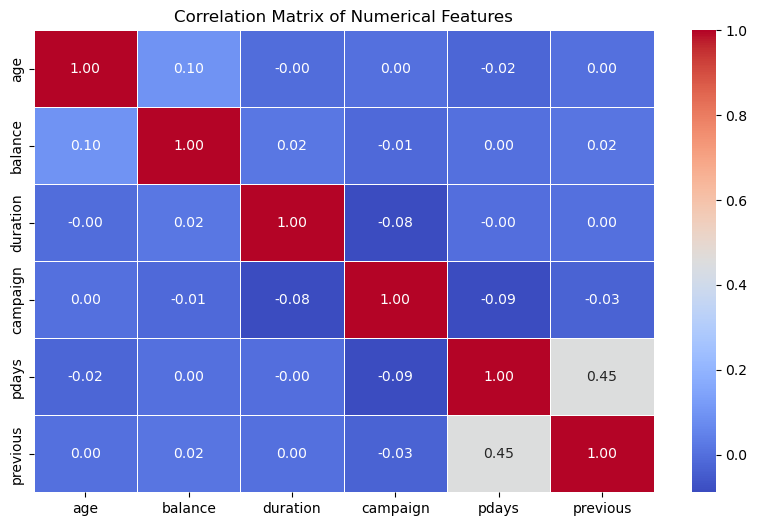

In [12]:
numerical_features = ["age", "balance", "duration", "campaign", "pdays", "previous"]

corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


To support interpretation of the correlation analysis, the numerical features included in the heatmap are briefly described below:

- **age**: Age of the customer at the time of the marketing campaign.  
- **balance**: Average yearly balance in the customer’s bank account (in euros).  
- **duration**: Duration of the last contact with the customer, measured in seconds.  
- **campaign**: Number of contacts performed during the current marketing campaign for this customer.  
- **pdays**: Number of days since the customer was last contacted in a previous marketing campaign. A value of **-1** indicates that the customer was not previously contacted.  
- **previous**: Number of contacts performed before the current campaign.  

These variables capture different aspects of customer demographics, financial status, and historical engagement with marketing campaigns, which helps explain the observed relationships (or lack thereof) in the correlation analysis.

The correlation heatmap shows that **most pairwise correlations are very close to zero**, indicating weak linear relationships between the numerical features. For example, the correlation between **age and balance is approximately 0.10**, while age has near-zero correlations with duration (**≈ 0.00**), campaign (**≈ 0.00**), pdays (**≈ -0.02**), and previous (**≈ 0.00**). Similarly, balance shows minimal correlation with duration (**≈ 0.02**), campaign (**≈ -0.01**), pdays (**≈ 0.00**), and previous (**≈ 0.02**). These low values suggest that demographic and financial variables capture largely independent information.

The strongest relationship observed in the heatmap is between **pdays and previous**, with a **moderate positive correlation of approximately 0.45**. This is clearly visible in the heatmap as the most prominent non-diagonal cell. This relationship is expected because both variables describe historical campaign interactions: customers who have been contacted previously are more likely to have a recorded number of days since their last contact. However, the presence of the special value **-1** in `pdays` (indicating no prior contact) likely weakens the linear correlation, even though a logical relationship exists. Despite this, the correlation is not high enough to suggest redundancy, as `previous` measures frequency while `pdays` measures recency.

Other campaign-related relationships are weakly negative, such as the correlation between **campaign and duration (≈ -0.08)** and between **campaign and pdays (≈ -0.09)**. These values indicate slight inverse relationships but are too small to imply strong linear dependence. This suggests that how often a customer is contacted in a campaign is largely independent of call duration and prior contact history.

Overall, the correlation analysis confirms that **multicollinearity among numerical features is not a major concern**, as no pair of variables (aside from `pdays` and `previous`) exceeds a moderate correlation level. This implies that linear models such as Logistic Regression are unlikely to be negatively affected by correlated inputs, while also motivating the use of more flexible models that can capture non-linear or interaction-based relationships with the target variable.


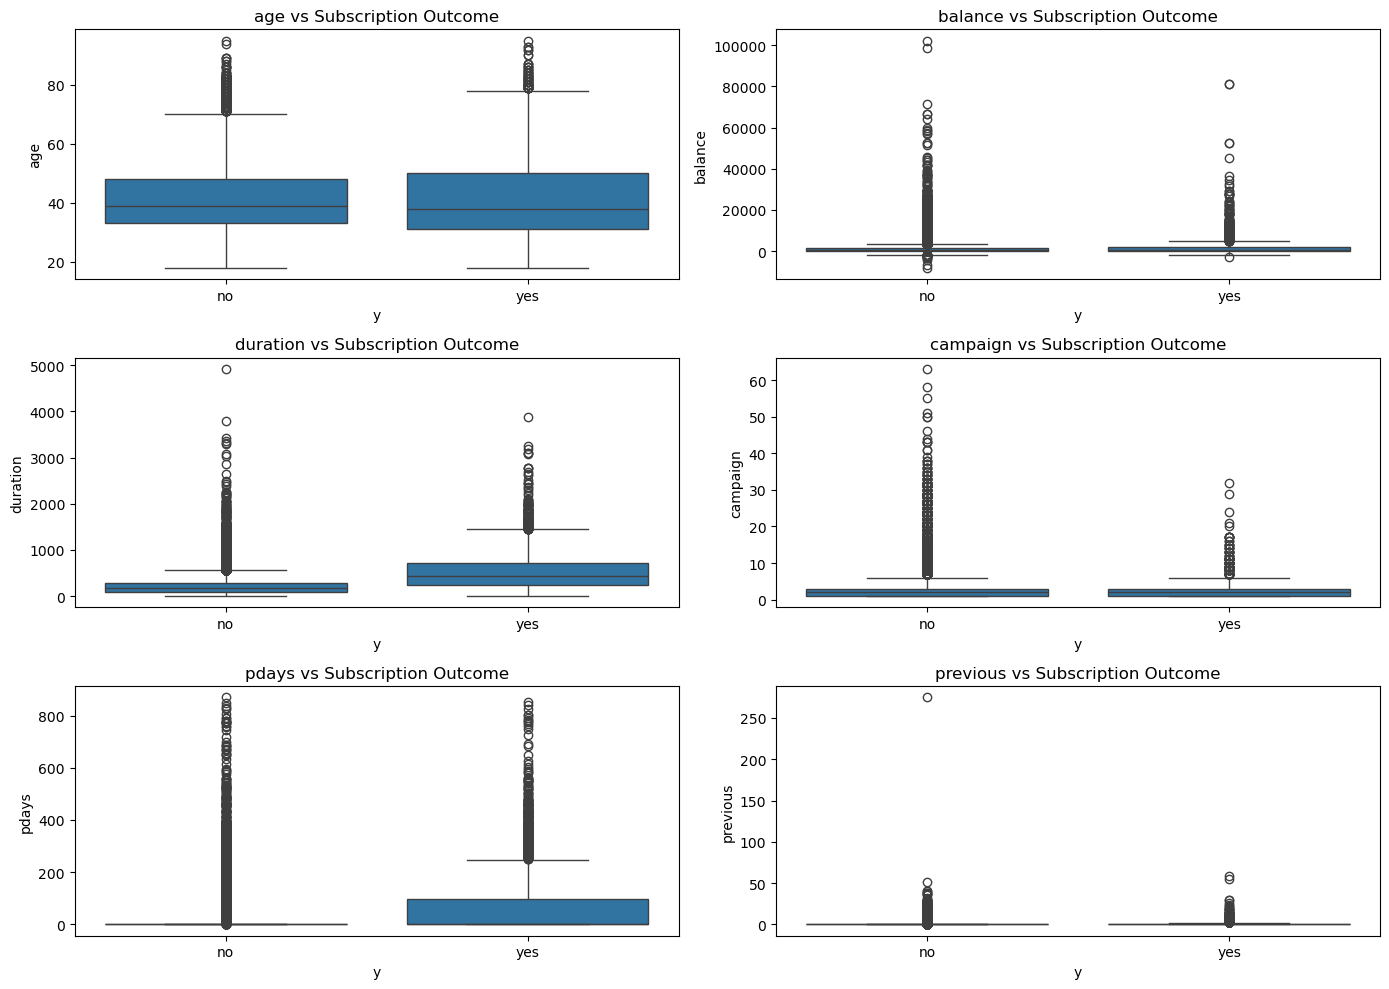

In [13]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(["age", "balance", "duration", "campaign", "pdays", "previous"], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x="y", y=col, data=df)
    plt.title(f"{col} vs Subscription Outcome")

plt.tight_layout()
plt.show()


The boxplots compare the distribution of numerical features between customers who **subscribed (yes)** and those who **did not subscribe (no)**, highlighting differences in median values, spread, and the presence of outliers for each feature.

Among all features, **call duration** shows the clearest separation between the two classes. Customers who did not subscribe have a median call duration of roughly **150–200 seconds**, while customers who subscribed show a noticeably higher median of around **400–500 seconds**. In addition, the upper quartile for subscribers extends well beyond **1,000 seconds**, with many outliers reaching **3,000–5,000 seconds**, compared to a lower concentration of long calls among non-subscribers. This substantial difference indicates that longer calls are strongly associated with successful subscription outcomes. However, since call duration is only known after the call ends, it may introduce data leakage if used directly in real-world prediction scenarios and should be interpreted cautiously.

The **campaign** feature also shows a visible difference between the two groups. Subscribed customers generally have a lower median number of contacts, typically around **1–2 contacts**, whereas non-subscribers have a slightly higher median and a much wider spread. Non-subscribers exhibit numerous outliers with more than **10 contacts**, and in extreme cases exceeding **50 contacts**, while such high contact frequencies are far less common among subscribers. This suggests diminishing returns from repeated contact and supports the idea that excessive follow-ups are associated with lower subscription success.

For **account balance**, both subscribed and non-subscribed customers display highly right-skewed distributions with substantial overlap. Median balances for both groups are close to **0**, with subscribers showing a slightly higher median. However, both classes contain extreme outliers, with balances exceeding **50,000** and reaching close to **100,000**. The heavy overlap indicates that balance alone is not a strong discriminator between the two outcomes, although it may still contribute predictive value when combined with other features.

The **age** distributions for the two classes are relatively similar. Both subscribed and non-subscribed customers have median ages in the **mid-to-late 30s**, with interquartile ranges spanning roughly **30 to 50 years**. While subscribers appear to have a slightly higher upper range, the large overlap suggests that age has limited discriminative power compared to behavioural features.

Historical campaign variables, **pdays** and **previous**, show more pronounced differences. For **pdays**, non-subscribers are heavily concentrated at **0 or near 0**, reflecting no prior contact or very recent non-engagement, whereas subscribers show a higher median and a broader spread, with many values extending beyond **100 days** and some reaching **800–900 days**. Similarly, the **previous** feature shows that most non-subscribers have **0 prior contacts**, while subscribers are more likely to have at least **1–2 previous contacts**, with outliers exceeding **20** in some cases. These patterns suggest that prior engagement history is meaningfully associated with subscription likelihood.

Overall, the boxplots provide clear evidence that **behavioural and historical features**, particularly call duration and prior campaign interaction variables, differentiate subscribers from non-subscribers more strongly than demographic or financial features. This supports the use of engagement-related variables as key predictors in the modelling stage, while also reinforcing the need to carefully handle features such as duration that may not be available at prediction time.


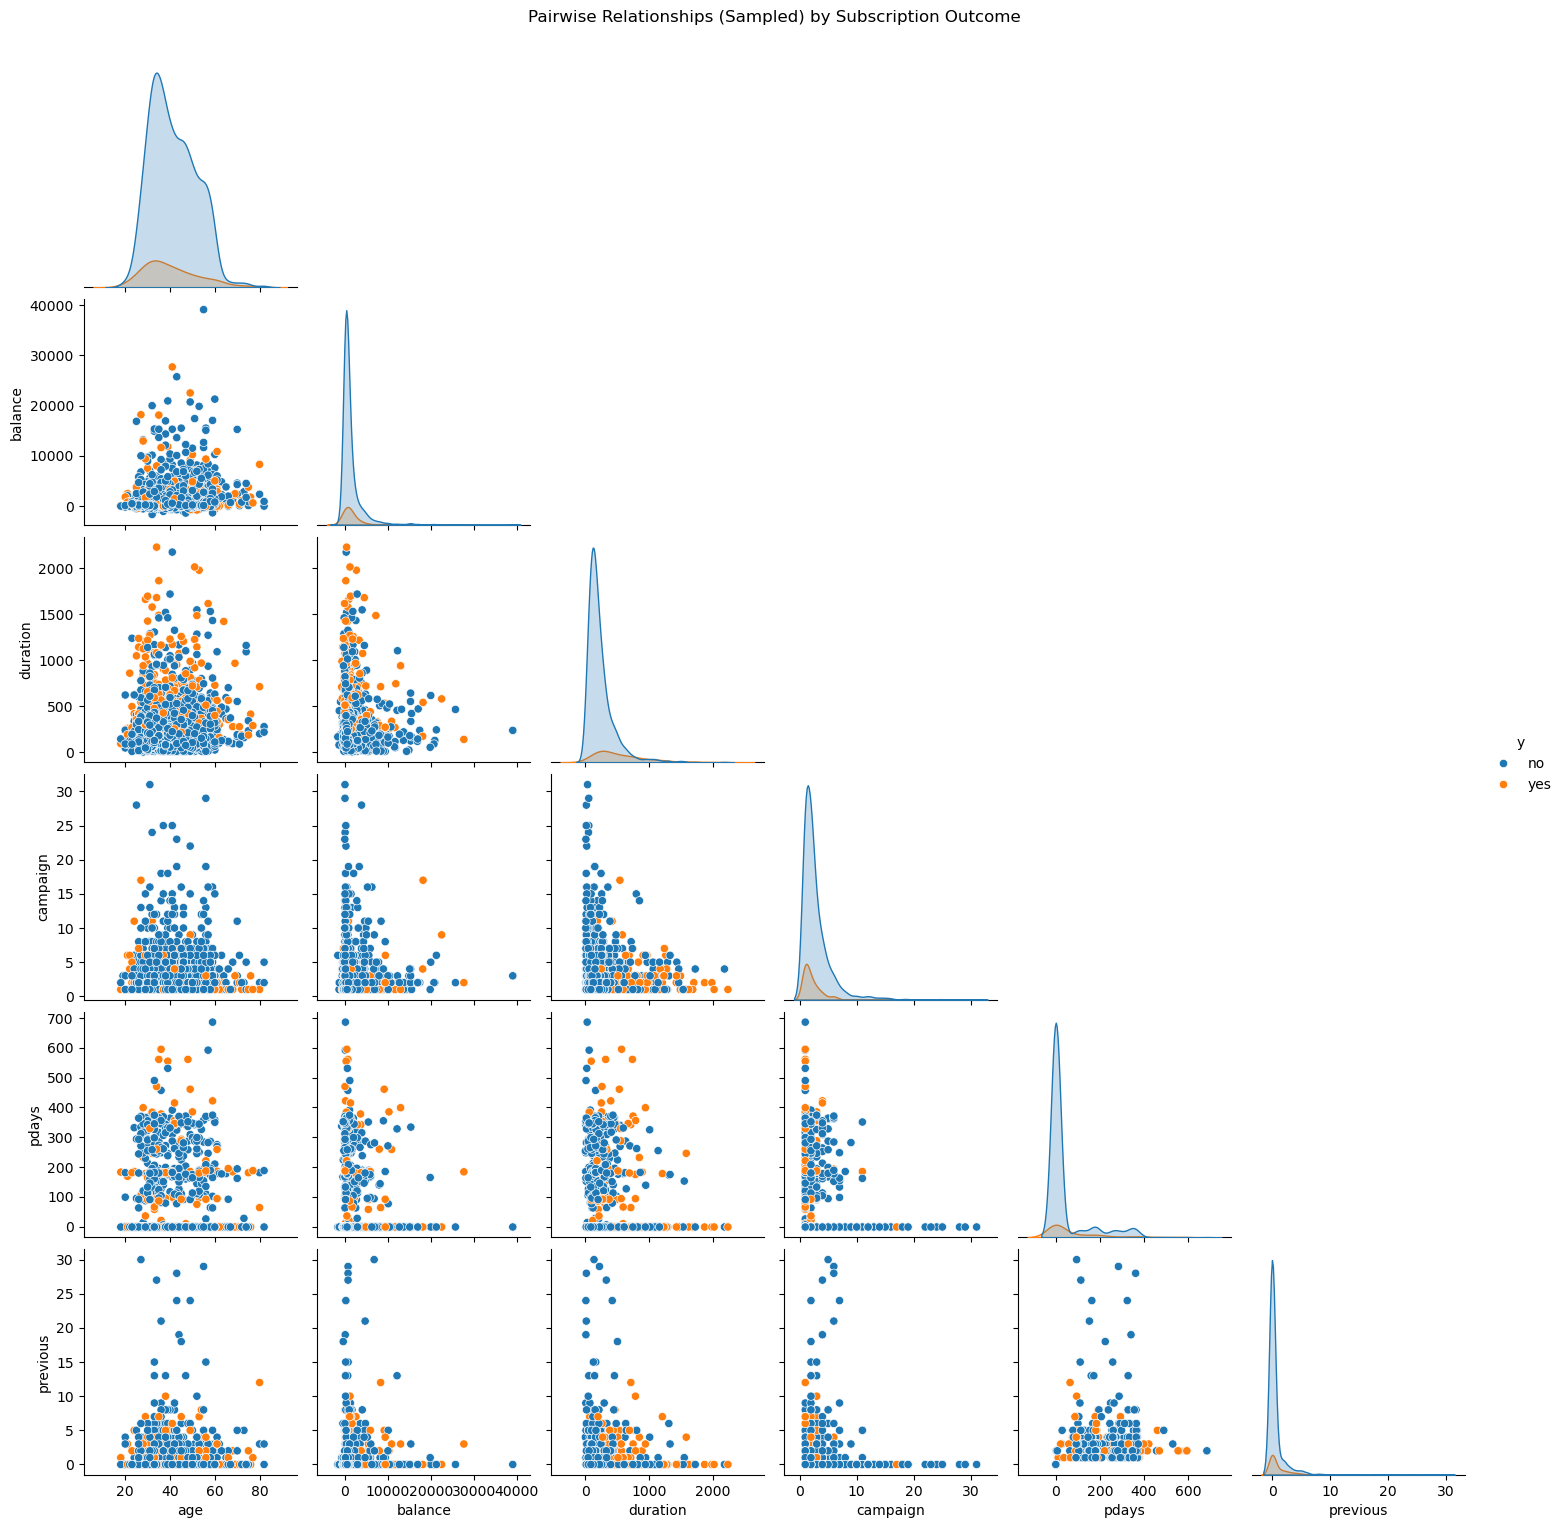

In [15]:
sample_df = df[numerical_features + ["y"]].sample(2000, random_state=42)
sns.pairplot(sample_df, hue="y", diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships (Sampled) by Subscription Outcome", y=1.02)
plt.show()


To further explore interactions between numerical features and assess whether relationships differ by subscription outcome, a pairplot was generated using a random sample of **2,000 observations** for visual clarity and computational efficiency. The plot displays marginal distributions on the diagonal and pairwise scatter plots off the diagonal, with colour indicating whether the customer **subscribed (yes)** or **did not subscribe (no)**.

From the diagonal density plots, most numerical features show strong right skewness. **Balance** values are concentrated close to **0**, with a long tail extending beyond **40,000**, while **duration** is heavily concentrated below **300 seconds**, with a small number of observations extending beyond **2,000 seconds**. Similarly, **campaign** values are mostly between **1 and 3 contacts**, **pdays** shows a large spike at **0 or near 0**, and **previous** is highly concentrated at **0**, confirming that most customers had no prior campaign history.

Comparing the density curves by subscription outcome, subscribed customers show visibly higher density at **longer call durations**, particularly beyond **300–400 seconds**, whereas non-subscribers are more concentrated at very short call durations. Subscribed customers also show slightly higher densities at non-zero values of **pdays** and **previous**, indicating a greater likelihood of prior campaign engagement compared to non-subscribers, who are mostly clustered at **0** for these variables.

The off-diagonal scatter plots reveal no clear linear separation between the two classes, which is consistent with the weak pairwise correlations observed earlier. However, meaningful interaction patterns are still visible. In plots involving **duration**, subscribed customers appear more frequently at higher values, while non-subscribers dominate regions with short durations. For **campaign**, subscribed customers are more commonly observed at lower contact counts (around **1–2 contacts**), whereas non-subscribers appear across a wider range, including higher values exceeding **10 contacts**. This pattern reinforces the notion of diminishing returns from repeated contact.

Interactions between **pdays** and **previous** show that subscribed customers are more often located in regions where both values are non-zero, while non-subscribers are heavily clustered near **(0, 0)**, reflecting no prior contact. Although there is substantial overlap between the two classes across most feature combinations, these regions of higher density for subscribers highlight non-linear relationships that are not captured by correlation coefficients alone.

Overall, the pairplot supports the conclusion that subscription behaviour is influenced by **complex, non-linear interactions**, particularly involving call duration and historical campaign engagement features. While linear separability is weak, the observed patterns provide further justification for using more flexible machine learning models, such as tree-based or ensemble methods, alongside linear models in subsequent stages of the analysis.


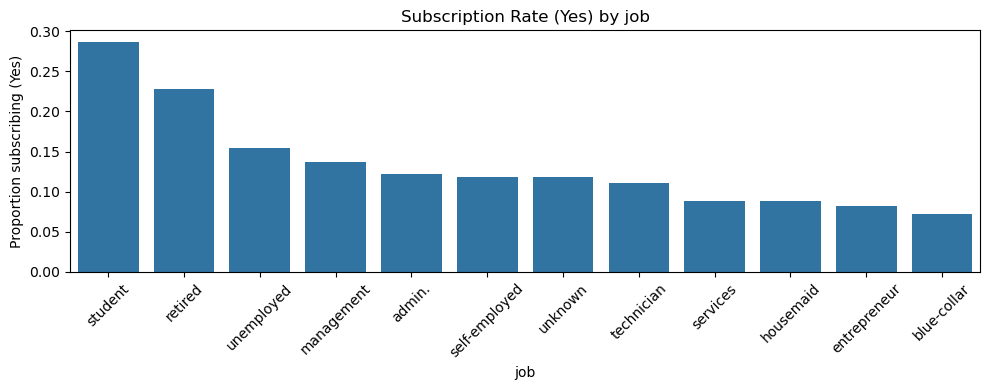

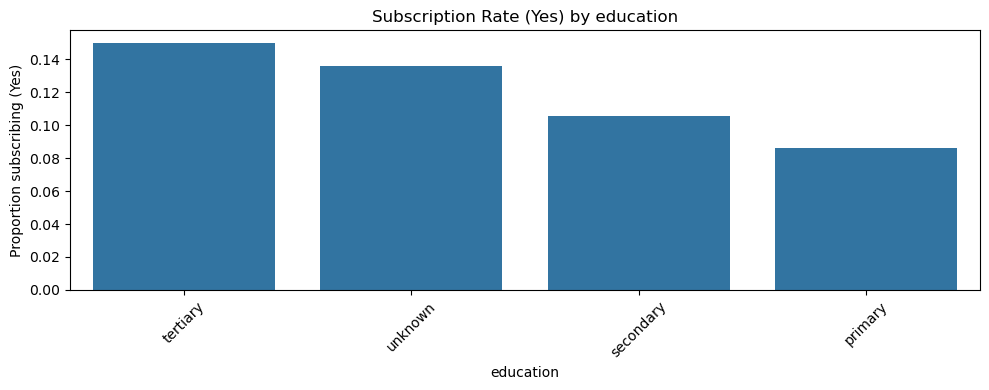

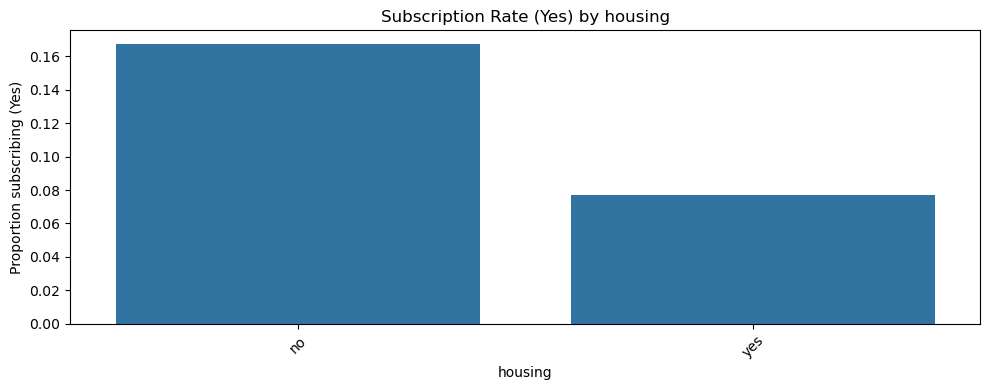

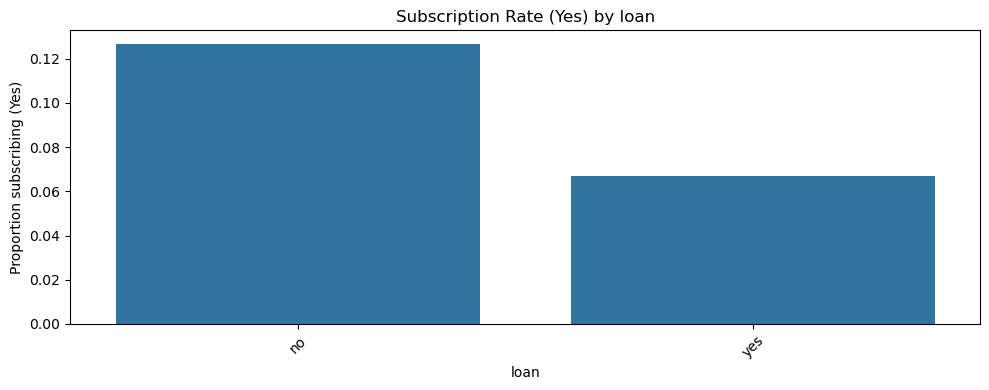

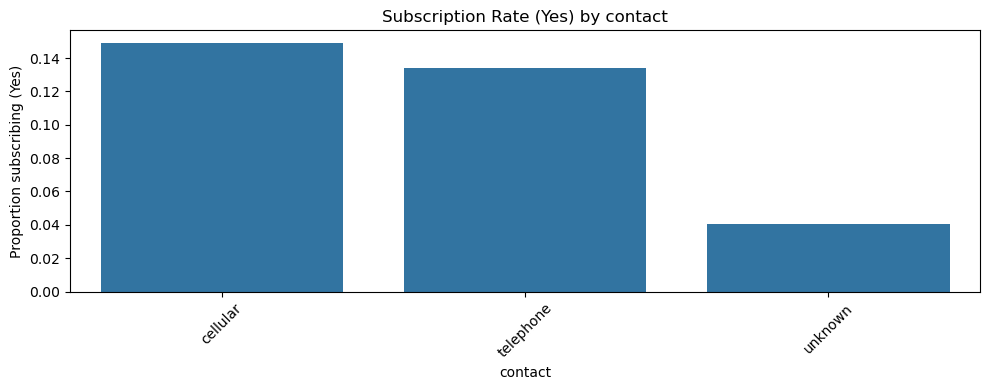

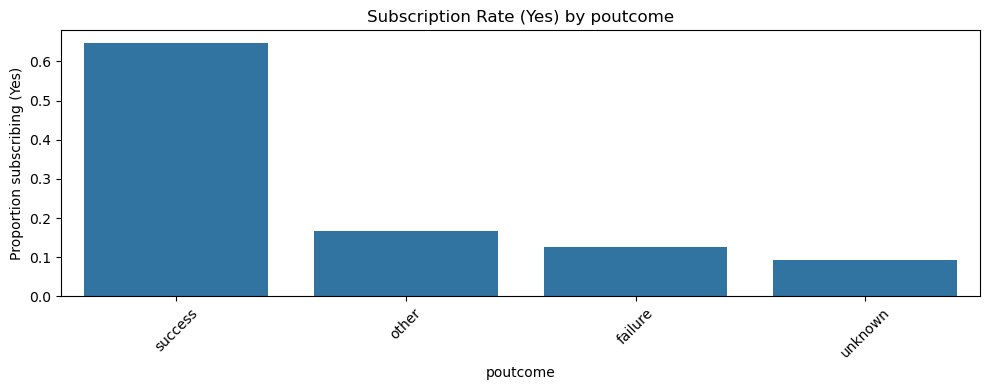

In [18]:
categorical_features = ["job", "education", "housing", "loan", "contact", "poutcome"]

for col in categorical_features:
    rate = pd.crosstab(df[col], df["y"], normalize="index")["yes"].sort_values(ascending=False)

    plt.figure(figsize=(10, 4))
    sns.barplot(x=rate.index, y=rate.values)
    plt.title(f"Subscription Rate (Yes) by {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Proportion subscribing (Yes)")
    plt.tight_layout()
    plt.show()


### Categorical Features vs Subscription Outcome

To analyse how categorical variables relate to subscription behaviour, subscription rates were computed for each category using normalised cross-tabulations. The bar charts show the **proportion of customers who subscribed (Yes)** within each category, allowing direct comparison of conversion likelihood rather than raw counts.

For **job**, subscription rates vary substantially across occupations. **Students** have the highest subscription rate at approximately **28–29%**, followed by **retired customers** at around **22–23%**. **Unemployed** and **management** roles show moderate subscription rates of roughly **14–16%**. In contrast, **blue-collar workers** have the lowest subscription rate at approximately **7–8%**, while **entrepreneurs** and **housemaids** also fall below **10%**. This clear spread suggests that life stage and income stability associated with occupation strongly influence receptiveness to term deposit products.

For **education**, customers with **tertiary education** exhibit the highest subscription rate at approximately **15%**, followed closely by those with **unknown education** at around **13–14%**. Customers with **secondary education** have a lower rate of about **10–11%**, while those with **primary education** show the lowest subscription rate at approximately **8–9%**. This gradient suggests that higher education levels are associated with greater likelihood of subscription, potentially reflecting higher financial literacy or income stability.

The **housing loan** feature shows a strong contrast. Customers **without a housing loan** have a subscription rate of approximately **16–17%**, whereas customers **with a housing loan** subscribe at a much lower rate of around **7–8%**. This indicates that customers with fewer long-term financial commitments are significantly more likely to invest in a term deposit.

A similar pattern is observed for **personal loans**. Customers **without a personal loan** have a subscription rate of approximately **12–13%**, compared to only **6–7%** for customers **with a personal loan**. This reinforces the idea that existing debt obligations reduce the likelihood of committing funds to long-term savings products.

For **contact type**, **cellular contact** yields the highest subscription rate at around **15%**, followed by **telephone contact** at approximately **13–14%**. In contrast, customers with **unknown contact methods** show a very low subscription rate of about **4%**. This highlights the effectiveness of direct and modern communication channels in driving successful conversions.

The strongest categorical relationship is observed for **previous campaign outcome (`poutcome`)**. Customers whose previous outcome was **success** have an exceptionally high subscription rate of approximately **65–67%**, far exceeding all other categories. Customers in the **other** category show a moderate subscription rate of around **16–17%**, while **failure** is associated with a lower rate of roughly **12–13%**. The **unknown** category has the lowest rate at approximately **9–10%**. Although the success category contains relatively few observations, its extremely high conversion rate makes it a powerful predictive feature.

Overall, the categorical feature analysis provides clear quantitative evidence that subscription behaviour differs substantially across customer segments. Variables such as **job**, **education**, **financial obligations**, **contact method**, and especially **previous campaign outcome** show large differences in subscription rates, justifying their inclusion in the modelling process and supporting the use of models capable of capturing categorical effects and interactions.


# 3. Data Preparation

## 3.1 Data Cleaning

In [20]:
df_prep = df.copy()

df_prep.shape, df_prep["y"].value_counts()


((45211, 17),
 y
 no     39922
 yes     5289
 Name: count, dtype: int64)


Before applying any data cleaning steps, a copy of the original dataset was created using `df.copy()` and stored as `df_prep`. This ensures that the raw dataset remains unchanged, allowing all preprocessing operations to be performed safely on a separate working copy. Preserving the original data is a good practice, as it enables reproducibility and allows comparisons between the raw and cleaned datasets if needed.

The dataset shape and target variable distribution were then inspected using `df_prep.shape` and `df_prep["y"].value_counts()`. The dataset contains **45,211 records and 17 columns**, confirming that no rows or features were altered during the copying process. The target variable `y` consists of two classes: **39,922 customers who did not subscribe** and **5,289 customers who subscribed** to a term deposit.

This step serves two purposes. First, it verifies that the dataset was copied correctly without data loss. Second, it establishes a baseline reference for the target distribution before any cleaning or preprocessing is applied. Maintaining this reference is important, as it allows subsequent checks to ensure that data cleaning steps do not unintentionally modify the target labels or distort the original class imbalance.


In [22]:
obj_cols = df_prep.select_dtypes(include="object").columns

for col in obj_cols:
    df_prep[col] = df_prep[col].str.strip().str.lower()

df_prep[obj_cols].head()


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no




To ensure consistency across categorical variables, all columns with data type `object` were first identified using `select_dtypes(include="object")`. These columns include customer attributes such as job, marital status, education, loan status, contact method, previous campaign outcome, and the target variable `y`.

For each categorical column, leading and trailing whitespaces were removed using `.str.strip()`, and all text values were converted to lowercase using `.str.lower()`. This standardisation step prevents logically identical categories from being treated as different values due to inconsistent formatting (e.g. "Yes" vs "yes", or accidental spaces).

Applying this transformation improves data quality and is essential for reliable categorical encoding in later stages. Without standardisation, encoding methods such as one-hot encoding could incorrectly create duplicate categories, increasing dimensionality and introducing noise into the model.

A preview of the cleaned categorical columns confirms that all text values are now consistently formatted. This step does not alter the semantic meaning of the data but ensures that categorical features are clean, uniform, and ready for preprocessing and modelling.


In [ ]:
df_prep.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


After standardising categorical text values, a missing value check was performed using `df_prep.isnull().sum()` to verify the completeness of the dataset before further preprocessing.

The results show that **all columns contain zero missing (NaN) values**, indicating that the dataset remains fully complete after the cleaning steps applied so far. This confirms that operations such as string standardisation did not introduce any unintended missing values.

Although the dataset contains values such as `"unknown"` in several categorical features, these represent **explicitly recorded but unobserved information**, rather than true missing data. As such, they are treated as valid categories and are not counted as null values.

Because no missing values are present, **no imputation techniques** (e.g. mean, median, or mode imputation) are required. This simplifies the preprocessing pipeline and reduces the risk of introducing bias through artificial value replacement.

Overall, this check confirms that the dataset is clean, complete, and ready for encoding and train–test splitting in subsequent steps.


In [23]:
unknown_counts = (df_prep[obj_cols] == "unknown").sum().sort_values(ascending=False)
unknown_counts[unknown_counts > 0]


poutcome     36959
contact      13020
education     1857
job            288
dtype: int64


Although no true missing (NaN) values are present in the dataset, several categorical features contain the value `"unknown"`, which represents explicitly recorded but unobserved information. To understand the extent of this issue, the number of `"unknown"` entries in each categorical column was calculated.

The results show that `"unknown"` values are not evenly distributed across features. The most affected variable is **poutcome**, with a very large number of `"unknown"` entries, indicating that for most customers, the outcome of a previous marketing campaign is not recorded. The **contact** feature also contains a substantial number of `"unknown"` values, suggesting that the communication channel was not always specified. In contrast, **education** and **job** contain relatively fewer `"unknown"` entries.

This analysis is important for guiding preprocessing decisions. The high prevalence of `"unknown"` in certain features suggests that these values carry meaningful information rather than representing random noise. For example, an `"unknown"` previous campaign outcome may itself indicate a lack of prior engagement, which could be predictive of subscription behaviour.

Therefore, instead of removing these records or treating `"unknown"` as missing data, the `"unknown"` category will be retained as a valid level during categorical encoding. This approach preserves potentially useful information while avoiding unnecessary data loss or biased imputation.


In [25]:
dup_count = df_prep.duplicated().sum()
dup_count

if dup_count > 0:
    df_prep = df_prep.drop_duplicates()
    df_prep = df_prep.drop_duplicates().reset_index(drop=True)

df_prep.shape

(45211, 17)


To ensure data integrity, a duplicate record check was performed using `df_prep.duplicated().sum()`. This step identifies whether any rows in the dataset are exact duplicates across all features. The results indicate that **no duplicate records are present** in the dataset, as the total row count remains unchanged at **45,211 records** after the check.

Even though no duplicates were detected, a conditional safeguard was included to remove duplicates and reset the index if any were found. Including this logic demonstrates good defensive programming practice and ensures that the dataset would remain clean if future data updates introduced duplicates. Overall, this step confirms that each row represents a unique customer record and that no duplicate-driven bias is introduced into the modelling process.


In [27]:
df_prep["y"].value_counts(), df_prep["y"].unique()


(y
 no     39922
 yes     5289
 Name: count, dtype: int64,
 array(['no', 'yes'], dtype=object))


After completing data cleaning steps, the target variable `y` was re-examined using `value_counts()` and `unique()` to confirm that its values remained unchanged. The target variable contains exactly **two distinct classes**, `"no"` and `"yes"`, with **39,922 non-subscribers** and **5,289 subscribers**, matching the original distribution observed before data cleaning.

This verification step ensures that preprocessing operations such as text standardisation and duplicate checks did not inadvertently alter or corrupt the target labels. Preserving the original target distribution is critical for maintaining class imbalance characteristics identified during exploratory analysis. Confirming target integrity at this stage ensures that subsequent feature encoding, model training, and evaluation are performed on a reliable and consistent target variable.


## 3.2 Train-Test Split

After data cleaning, the dataset is prepared for modelling by separating the input features (`X`) from the target variable (`y`) and splitting the data into training and testing sets. A train–test split allows model performance to be evaluated on unseen data, providing a realistic estimate of how well the model generalises to new customers.

Because the target variable is imbalanced (many more non-subscribers than subscribers), a **stratified train–test split** is applied using `stratify=y`. This preserves the original class proportions in both the training and test sets, preventing biased evaluation caused by uneven class distributions. An **80/20 split** is used to retain sufficient data for training while keeping a large enough test set to produce stable and reliable evaluation results.

In this project, splitting is performed **before one-hot encoding** to maintain a clean and leakage-free workflow. Keeping the test set unseen ensures that feature construction and model training are driven only by training data. After splitting, categorical features will be one-hot encoded and the resulting train and test feature sets will be aligned to ensure both contain the same columns, preventing feature mismatch during evaluation.

Finally, the class proportions in the training and test sets are verified to confirm that stratification worked correctly. Similar proportions between the two sets indicate that evaluation results computed later will be meaningful and comparable.


In [ ]:
from sklearn.model_selection import train_test_split

X = df_prep.drop(columns=["y"])
y = df_prep["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("\nTarget distribution (train):")
print(y_train.value_counts(normalize=True))
print("\nTarget distribution (test):")
print(y_test.value_counts(normalize=True))


X_train: (36168, 16) X_test: (9043, 16)

Target distribution (train):
y
no     0.883018
yes    0.116982
Name: proportion, dtype: float64

Target distribution (test):
y
no     0.883003
yes    0.116997
Name: proportion, dtype: float64


In [ ]:
print("X_train:", X_train.shape, "X_test:", X_test.shape)

dist_df = pd.DataFrame({
    "Train": y_train.value_counts(normalize=True),
    "Test": y_test.value_counts(normalize=True)
})
dist_df


X_train: (36168, 16) X_test: (9043, 16)


,Train,Test
y,,
no,0.883018,0.883003
yes,0.116982,0.116997


To verify that stratification was applied correctly, the class distribution of the target variable is compared between the training and test sets. Since the dataset is imbalanced, both sets should retain similar proportions of subscribers (`yes`) and non-subscribers (`no`).

The results show that the class proportions in the training and test sets are nearly identical, confirming that the stratified train–test split successfully preserved the original class imbalance. This ensures that evaluation metrics computed later are meaningful, fair, and comparable, and that model performance reflects real-world behaviour on unseen data.


# 4. Modelling

### 4.2 Train Model

In [38]:
y_train_bin = y_train.map({"no": 0, "yes": 1})
y_test_bin  = y_test.map({"no": 0, "yes": 1})

The target variable `y` is originally represented as categorical labels (`"yes"` and `"no"`).  
Since most machine learning algorithms, including Logistic Regression, require the target variable to be numerical, the labels are converted into a binary numeric format.

In this step:
- `"no"` is mapped to `0`
- `"yes"` is mapped to `1`

In [39]:
cat_cols = X_train.select_dtypes(include="object").columns

X_train_enc = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test_enc  = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)



Machine learning models such as Logistic Regression require all input features to be numerical.  
However, the dataset contains several categorical variables (e.g. job, education, contact type), which cannot be used directly by the model.

To address this, **one-hot encoding** is applied to convert categorical variables into binary indicator columns.


In [40]:
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

print("After encoding + alignment:")
print("X_train:", X_train_enc.shape, "X_test:", X_test_enc.shape)

After encoding + alignment:
X_train: (36168, 42) X_test: (9043, 42)



After one-hot encoding, the training and testing datasets may contain **different sets of feature columns**. This occurs because some categorical levels may appear in the training data but not in the test data, or vice versa.

To ensure compatibility between the datasets, column alignment is performed so that both the training and test sets share the **same features in the same order**.



In [43]:
num_cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]

scaler = StandardScaler()

X_train_ready = X_train_enc.copy()
X_test_ready  = X_test_enc.copy()

X_train_ready[num_cols] = scaler.fit_transform(X_train_enc[num_cols])
X_test_ready[num_cols]  = scaler.transform(X_test_enc[num_cols])

print("\nAfter scaling numerical features:")
print("X_train_ready:", X_train_ready.shape, "X_test_ready:", X_test_ready.shape)
print("y_train_bin distribution:\n", y_train_bin.value_counts(normalize=True))
print("y_test_bin distribution:\n", y_test_bin.value_counts(normalize=True))


After scaling numerical features:
X_train_ready: (36168, 42) X_test_ready: (9043, 42)
y_train_bin distribution:
 y
0    0.883018
1    0.116982
Name: proportion, dtype: float64
y_test_bin distribution:
 y
0    0.883003
1    0.116997
Name: proportion, dtype: float64



In this step, the numerical features are scaled using **StandardScaler**, which standardizes each selected numeric column to have a **mean of 0** and a **standard deviation of 1**. This is especially important because the dataset contains numerical variables with very different units and ranges (e.g., **age** in years, **balance** in euros, **duration** in seconds, and **campaign counts**).


## Baseline Model: Logistic Regression

Logistic Regression is selected as the baseline model for this project because it is a well-established and interpretable algorithm for binary classification problems. It provides a strong reference point for evaluating whether more complex models offer meaningful improvements.

In the context of bank marketing, Logistic Regression is particularly suitable because:
- It outputs probabilities, which can be used to rank customers by likelihood of subscription.
- Its coefficients are interpretable, allowing insights into how different features influence subscription decisions.
- It performs well on tabular data after proper encoding and scaling.

As a baseline model, Logistic Regression helps establish an initial performance benchmark before exploring more advanced models.


In [57]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=5000,
    class_weight="balanced",
    solver="lbfgs",
    random_state=42
)

log_reg.fit(X_train_ready, y_train_bin)
y_pred_lr = log_reg.predict(X_test_ready)



### Model Configuration and Hyperparameters

The Logistic Regression model is configured with the following settings:

- **`max_iter=5000`**: Increases the maximum number of optimisation iterations to ensure convergence, especially given the high-dimensional feature space created by one-hot encoding.
- **`class_weight="balanced"`**: Adjusts class weights inversely proportional to class frequencies to address the strong class imbalance in the dataset.
- **`solver="lbfgs"`**: A robust optimisation algorithm suitable for medium-sized datasets and binary classification.
- **`random_state=42`**: Ensures reproducibility of results.

These settings prioritise stability, fairness to the minority class, and reproducibility.


### Model Training

The Logistic Regression model is trained using:
- **`X_train_ready`**: The fully prepared training features (one-hot encoded, column-aligned, and scaled).
- **`y_train_bin`**: The binary target variable (0 = no subscription, 1 = subscription).

During training, the model learns feature coefficients that estimate the probability of a customer subscribing to a term deposit. Only the training data is used at this stage to preserve the integrity of later evaluation.


### Class Label Prediction

The trained model is used to predict class labels on **`X_test_ready`**, which represents unseen customer data.

Predicting on the test set allows evaluation of the model’s generalisation ability. Importantly, predictions are made using the same encoded and scaled feature format as the training data to ensure consistency.


## Second Model: Random Forest Classifier

Random Forest is selected as the second model to complement Logistic Regression by capturing non-linear relationships and feature interactions that a linear model cannot represent.

In the context of bank marketing:
- Customer behaviour is influenced by complex interactions between demographics, financial status, and campaign engagement.
- Random Forest can automatically model these interactions without manual feature engineering.
- It is robust to outliers, skewed distributions, and noisy features, which are present in this dataset.

By comparing Random Forest with Logistic Regression, this project evaluates whether a more flexible, non-linear model can improve the identification of potential subscribers.


In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_ready, y_train_bin)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Random Forest Setup and Training (Second Model)

Random Forest is used as the second model to complement Logistic Regression by capturing **non-linear relationships** and **feature interactions** that a linear model may miss. In a bank marketing context, subscription decisions are rarely driven by one factor alone; they are influenced by combinations of behaviour (e.g., engagement duration), financial profile (e.g., balance), and campaign history. Random Forest is designed to model these complex patterns by learning many decision trees and aggregating their results.

**Why this model is appropriate:**
- **Non-linear modelling:** Unlike Logistic Regression, Random Forest does not assume a linear relationship between features and subscription likelihood.
- **Feature interactions:** It can naturally learn interactions such as “certain job types + longer calls + past success” without manually engineering interaction terms.
- **Robustness:** Tree-based methods are less sensitive to skewed numerical distributions and outliers (common in `balance` and `duration`).

**Hyperparameter justification:**
- **`n_estimators=300`** increases stability and reduces variance by averaging more trees. This typically improves generalisation and makes results less dependent on a small number of trees.
- **`class_weight="balanced"`** addresses the strong class imbalance by increasing the penalty for misclassifying subscribers (“Yes”), so the model does not simply optimise for the majority “No” class.
- **`n_jobs=-1`** speeds up training by using all CPU cores, which is efficient because Random Forest trains trees in parallel.
- **`random_state=42`** ensures reproducible training and fair comparison with Logistic Regression.

The model is trained using `X_train_ready` and `y_train_bin` to keep the evaluation fair and consistent across models (same split, same prepared features).


# 5. Model Evaluation

In [109]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

y_pred_lr = log_reg.predict(X_test_ready)

print("=== Classification Report (Logistic Regression) ===")
print(classification_report(
    y_test_bin, y_pred_lr,
    target_names=["No", "Yes"]
))

cm = confusion_matrix(y_test_bin, y_pred_lr)
print("=== Confusion Matrix ===")
print(cm)

f1_lr = f1_score(y_test_bin, y_pred_lr, pos_label=1)
print("=== F1-score (Yes class) ===")
print(f1_lr)


=== Classification Report (Logistic Regression) ===
              precision    recall  f1-score   support

          No       0.97      0.85      0.91      7985
         Yes       0.42      0.81      0.55      1058

    accuracy                           0.85      9043
   macro avg       0.69      0.83      0.73      9043
weighted avg       0.91      0.85      0.87      9043

=== Confusion Matrix ===
[[6785 1200]
 [ 196  862]]
=== F1-score (Yes class) ===
0.5525641025641026



## Model Evaluation: Logistic Regression (Baseline Model)

#### Choice of Evaluation Metric: F1-Score 

The **F1-score for the “Yes” (subscription) class** is selected as the primary evaluation metric because it provides a balanced measure of **precision** and **recall**, which is crucial in imbalanced classification problems.

- **Precision** measures how many predicted subscribers actually subscribed.
- **Recall** measures how many actual subscribers were correctly identified by the model.

The F1-score is defined as:

\[
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
\]

This metric is particularly suitable for this task because:
- A **false positive** (predicting a subscription when the customer does not subscribe) wastes marketing resources.
- A **false negative** (failing to identify a potential subscriber) results in missed revenue opportunities.

By combining both precision and recall, the F1-score ensures neither error type dominates the evaluation.


### Logistic Regression Performance on Test Set

Based on the classification report, the model achieved the following results:

#### “Yes” (Subscription) Class Metrics
- **Precision:** 0.42  
- **Recall:** 0.81  
- **F1-score:** **0.55**  
- **Support:** 1,058 customers

The model demonstrates **high recall**, successfully identifying **81% of actual subscribers**, indicating strong sensitivity toward the minority class. However, the lower precision suggests that many customers predicted as subscribers did not actually subscribe.


### Confusion Matrix Analysis

The confusion matrix for the Logistic Regression model is:

\[
\begin{bmatrix}
6785 & 1200 \\
196 & 862
\end{bmatrix}
\]

- **True Positives (862):** Correctly identified subscribers  
- **False Negatives (196):** Actual subscribers missed by the model  
- **False Positives (1200):** Non-subscribers incorrectly predicted as subscribers  
- **True Negatives (6785):** Correctly identified non-subscribers  

The relatively low number of false negatives supports the high recall value, while the larger number of false positives explains the reduced precision.


### Interpretation of F1-Score

The F1-score of **0.55** for the subscription class reflects a **balanced trade-off** between precision and recall. While the model prioritises identifying potential subscribers (high recall), it does so at the cost of precision. This behaviour is acceptable for a baseline model, as it establishes a performance benchmark and highlights areas for improvement in subsequent models.


### Baseline Model Justification

As a baseline, Logistic Regression provides:
- A **clear and interpretable performance benchmark**
- Strong recall for the minority class
- A reasonable F1-score given the dataset imbalance

These results justify the use of Logistic Regression as a baseline model before progressing to more complex models, such as ensemble-based classifiers, which may improve precision while maintaining or enhancing recall.



In [108]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

y_pred_rf = rf.predict(X_test_ready)
y_prob_rf = rf.predict_proba(X_test_ready)[:, 1]

print("=== Random Forest: Classification Report ===")
print(classification_report(y_test_bin, y_pred_rf, target_names=["No", "Yes"]))

cm_rf = confusion_matrix(y_test_bin, y_pred_rf)
print("=== Random Forest: Confusion Matrix ===")
print(cm_rf)

f1_rf = f1_score(y_test_bin, y_pred_rf, pos_label=1)
print("=== Random Forest: F1-score (Yes class) ===")
print(f1_rf)


=== Random Forest: Classification Report ===
              precision    recall  f1-score   support

          No       0.92      0.98      0.95      7985
         Yes       0.70      0.34      0.45      1058

    accuracy                           0.91      9043
   macro avg       0.81      0.66      0.70      9043
weighted avg       0.89      0.91      0.89      9043

=== Random Forest: Confusion Matrix ===
[[7830  155]
 [ 701  357]]
=== Random Forest: F1-score (Yes class) ===
0.4547770700636943


## Model Evaluation (Second Model: Random Forest Classifier)

### Evaluation Objective
The purpose of this evaluation is to assess whether a more complex, non-linear model such as Random Forest can improve the identification of customers who are likely to subscribe to a term deposit, compared to the baseline Logistic Regression model. As with the baseline evaluation, particular emphasis is placed on the model’s performance on the minority “Yes” (subscription) class due to the strong class imbalance present in the dataset.


### Choice of Evaluation Metric: F1-Score 

The **F1-score for the “Yes” (subscription) class** remains the primary evaluation metric for the Random Forest model to ensure a fair and consistent comparison with Logistic Regression.

Although Random Forest achieves higher overall accuracy, accuracy alone is not sufficient for this task. The F1-score is preferred because it balances:

- **Precision**: The proportion of predicted subscribers who actually subscribed.
- **Recall**: The proportion of actual subscribers correctly identified by the model.

The F1-score is defined as:

\[
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
\]

This metric is critical in a bank marketing context, where both excessive false positives (wasted marketing effort) and false negatives (missed potential subscribers) have tangible business costs.


### Random Forest Performance on Test Set

Based on the classification report, the Random Forest model achieved the following results:

#### “Yes” (Subscription) Class Metrics
- **Precision:** 0.70  
- **Recall:** 0.34  
- **F1-score:** **0.45**  
- **Support:** 1,058 customers

The model demonstrates **high precision**, meaning that when it predicts a customer will subscribe, it is often correct. However, this comes at the expense of **low recall**, as the model fails to identify a large proportion of actual subscribers.


### Confusion Matrix Analysis

The confusion matrix for the Random Forest model is:

\[
\begin{bmatrix}
7830 & 155 \\
701 & 357
\end{bmatrix}
\]

- **True Positives (357):** Correctly identified subscribers  
- **False Negatives (701):** Actual subscribers missed by the model  
- **False Positives (155):** Non-subscribers incorrectly predicted as subscribers  
- **True Negatives (7830):** Correctly identified non-subscribers  

Compared to Logistic Regression, Random Forest produces **far fewer false positives**, but at the cost of a **much larger number of false negatives**, which directly reduces recall.


### Interpretation of F1-Score

The F1-score of **0.45** for the subscription class indicates that, despite higher precision and overall accuracy, the Random Forest model performs worse than Logistic Regression in terms of balanced minority-class detection. The low recall significantly penalises the F1-score, as the model fails to capture a substantial portion of potential subscribers.

This behaviour suggests that Random Forest adopts a more conservative prediction strategy, prioritising correctness of positive predictions rather than coverage of the positive class.



## Model Comparison
### Comparison of Key Performance Metrics (Yes Class)

| Metric        | Logistic Regression | Random Forest |
|--------------|--------------------|---------------|
| Precision    | 0.42               | 0.70          |
| Recall       | 0.81               | 0.34          |
| F1-score     | **0.55**           | **0.45**      |
| Accuracy     | 0.85               | 0.91          |

While Random Forest achieves higher accuracy and precision, Logistic Regression outperforms Random Forest on **recall** and **F1-score**, which are more critical for this imbalanced classification problem.


### Confusion Matrix Comparison

**Logistic Regression Confusion Matrix:**
\[
\begin{bmatrix}
6785 & 1200 \\
196 & 862
\end{bmatrix}
\]

**Random Forest Confusion Matrix:**
\[
\begin{bmatrix}
7830 & 155 \\
701 & 357
\end{bmatrix}
\]

- Logistic Regression correctly identifies **862 subscribers** and misses **196**.
- Random Forest correctly identifies only **357 subscribers** and misses **701**.

This shows that Logistic Regression captures a significantly larger proportion of actual subscribers, while Random Forest adopts a more conservative strategy that heavily favours the majority “No” class.

### Interpretation of F1-Score Differences

The **F1-score** penalises imbalanced performance between precision and recall. Although Random Forest has high precision (0.70), its low recall (0.34) substantially reduces its F1-score to **0.45**. In contrast, Logistic Regression achieves a more balanced trade-off between precision (0.42) and recall (0.81), resulting in a higher F1-score of **0.55**.

This indicates that Logistic Regression is better at **consistently identifying potential subscribers**, which aligns more closely with the problem objective.


### Business Context Justification

In a bank marketing scenario:
- **False negatives** (missing potential subscribers) result in lost revenue opportunities.
- **False positives** (contacting uninterested customers) incur marketing costs but are generally less damaging.

Logistic Regression’s higher recall significantly reduces false negatives, making it more suitable for identifying customers worth targeting. Although this comes at the cost of lower precision, the overall balance achieved by Logistic Regression leads to superior performance on the chosen primary metric.


### Final Model Selection

Based on the comparative evaluation:
- Logistic Regression achieves a higher **F1-score (0.55 vs 0.45)**.
- It identifies **more than twice as many actual subscribers** as Random Forest.
- Its performance aligns more closely with the business objective of maximising subscriber identification.

Therefore, **Logistic Regression is selected as the final model** for this project. Random Forest serves as a valuable comparative model, demonstrating that increased model complexity and higher accuracy do not necessarily lead to better performance on the target objective in imbalanced classification tasks.


## Prediction on Unseen Data

In [78]:

sample_idx = X_test_ready.sample(3, random_state=42).index
X_unseen_test = X_test_ready.loc[sample_idx]
y_unseen_true = y_test_bin.loc[sample_idx]

y_pred_unseen = log_reg.predict(X_unseen_test)
y_prob_unseen = log_reg.predict_proba(X_unseen_test)[:, 1]

unseen_test_results = pd.DataFrame({
    "Actual_Target (Yes=1)": y_unseen_true.values,
    "Predicted_Target (Yes=1)": y_pred_unseen,
    "Prob_Subscribe_Yes": y_prob_unseen.round(3)
}, index=sample_idx)

unseen_test_results


,Actual_Target (Yes=1),Predicted_Target (Yes=1),Prob_Subscribe_Yes
21198,0,1,0.580
22128,0,0,0.182
31281,1,1,0.993


In [79]:

new_customer = {
    "age": 42,
    "job": "technician",
    "marital": "married",
    "education": "secondary",
    "default": "no",
    "balance": 1500,
    "housing": "yes",
    "loan": "no",
    "contact": "cellular",
    "day": 15,
    "month": "may",
    "duration": 320,
    "campaign": 2,
    "pdays": 999,
    "previous": 0,
    "poutcome": "unknown"
}

X_new = pd.DataFrame([new_customer])


In [80]:

X_new_encoded = pd.get_dummies(X_new, drop_first=False)

X_new_ready = X_train_ready.align(
    X_new_encoded,
    join="left",
    axis=1,
    fill_value=0
)[0]


In [81]:
pred_class_new = log_reg.predict(X_new_ready)[0]
pred_prob_new = log_reg.predict_proba(X_new_ready)[0, 1]

print("=== Completely Unseen Customer Prediction ===")
print("Predicted Target (Yes=1):", pred_class_new)
print("Probability of Subscription (Yes):", round(pred_prob_new, 3))


=== Completely Unseen Customer Prediction ===
Predicted Target (Yes=1): 0
Probability of Subscription (Yes): 0.25


## Prediction on Unseen Data and Justification

After selecting Logistic Regression as the final model based on F1-score performance, the model is applied to unseen data to demonstrate how it would be used beyond training and evaluation. Two types of unseen data are considered to reflect different real-world and academic objectives.

### Unseen Data from Test Set (With Actual Target)

The first set of unseen data is sampled from the test dataset, which was not used during model training. Although the true target labels are available for these samples, they are treated as unseen at prediction time.

This step serves as a **sanity check** to verify that the final model generalises correctly to new data points. By comparing the predicted targets against the actual targets, it confirms that the model behaves consistently outside the training data.

This approach is important because:
- It validates the correctness of the prediction pipeline.
- It demonstrates proper separation between training and evaluation data.
- It allows inspection of prediction confidence through probabilities while still having ground truth for verification.

However, this setup still differs from real deployment, as actual outcomes are known after prediction.

### Completely New Unseen Data (No Actual Target)

The second set of unseen data consists of a **manually created customer profile** that does not exist anywhere in the original dataset. This data has no associated target label and represents a realistic scenario where the model is applied to new customers whose subscription outcomes are unknown.

This step simulates **real-world deployment**, where:
- The bank does not know whether a customer will subscribe.
- The model’s output is used to support decision-making rather than evaluation.
- Predicted probabilities are more valuable than class labels alone.

By reporting the probability of subscription, the model enables business users to:
- Rank customers by likelihood of subscription.
- Set decision thresholds based on campaign budget or capacity.
- Prioritise high-probability customers for targeted marketing.

### Justification for Using Both Approaches

Using both types of unseen data provides a complete demonstration of the model’s effectiveness:

- **Test-set unseen data** confirms that the model generalises well and produces reliable predictions on data outside the training process.
- **Completely new unseen data** shows how the model would be used in practice, where no ground truth is available and decisions must be made based on predicted probabilities.

Together, these steps demonstrate a full machine learning workflow from training and evaluation to deployment-ready prediction, reinforcing the practical applicability of the selected Logistic Regression model.


## Iterative model development


### Unsupervised Learning

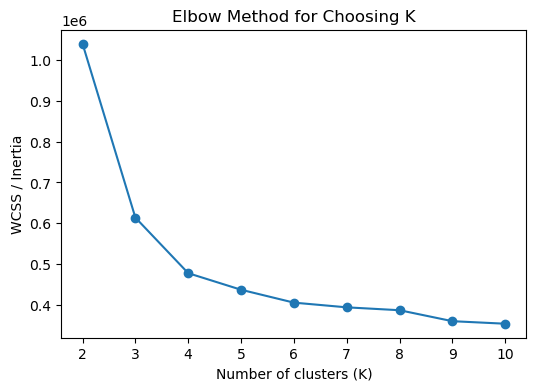

[1039454.5279658801,
 613992.3550766739,
 478039.13641642587,
 437488.9038491052,
 405958.14653646643,
 394452.622453109,
 387394.1191336721,
 360560.97685820074,
 354362.69479848654]

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

X_for_cluster = X_train_ready

wcss = []
K_range = range(2, 11)

for k in K_range:
    km = MiniBatchKMeans(
        n_clusters=k,
        random_state=42,
        batch_size=2048,
        n_init=10
    )
    km.fit(X_for_cluster)
    wcss.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(list(K_range), wcss, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS / Inertia")
plt.title("Elbow Method for Choosing K")
plt.show()

wcss


In [ ]:

from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import OneHotEncoder
from scipy import sparse
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix

BEST_K = 4

kmeans = MiniBatchKMeans(
    n_clusters=BEST_K,
    random_state=42,
    batch_size=2048,
    n_init=10
)
kmeans.fit(X_train_ready)

train_clusters = kmeans.predict(X_train_ready).reshape(-1, 1)
test_clusters  = kmeans.predict(X_test_ready).reshape(-1, 1)

ohe_cluster = OneHotEncoder(sparse_output=True, handle_unknown="ignore")
train_cluster_ohe = ohe_cluster.fit_transform(train_clusters)
test_cluster_ohe  = ohe_cluster.transform(test_clusters)

X_train_aug = sparse.hstack([X_train_ready, train_cluster_ohe]).tocsr() if sparse.issparse(X_train_ready) else np.hstack([X_train_ready, train_cluster_ohe.toarray()])
X_test_aug  = sparse.hstack([X_test_ready,  test_cluster_ohe]).tocsr()  if sparse.issparse(X_test_ready)  else np.hstack([X_test_ready,  test_cluster_ohe.toarray()])

log_reg_kmeans = LogisticRegression(
    max_iter=5000,
    class_weight="balanced",
    solver="lbfgs",
    random_state=42
)
log_reg_kmeans.fit(X_train_aug, y_train_bin)

y_pred_km = log_reg_kmeans.predict(X_test_aug)
f1_km = f1_score(y_test_bin, y_pred_km, pos_label=1)

print("=== Logistic Regression + KMeans Feature ===")
print("F1-score (Yes class):", round(f1_km, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_bin, y_pred_km))
print("\nClassification Report:\n", classification_report(y_test_bin, y_pred_km, target_names=["No","Yes"]))

baseline_f1_lr = 0.5526
print("\nBaseline LR F1 (Yes):", baseline_f1_lr)
print("Change in F1:", round(f1_km - baseline_f1_lr, 4))


=== Logistic Regression + KMeans Feature ===
F1-score (Yes class): 0.5507

Confusion Matrix:
 [[6790 1195]
 [ 202  856]]

Classification Report:
               precision    recall  f1-score   support

          No       0.97      0.85      0.91      7985
         Yes       0.42      0.81      0.55      1058

    accuracy                           0.85      9043
   macro avg       0.69      0.83      0.73      9043
weighted avg       0.91      0.85      0.87      9043


Baseline LR F1 (Yes): 0.5526
Change in F1: -0.0019


In [ ]:

from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

Xtr = X_train_ready.toarray() if sparse.issparse(X_train_ready) else X_train_ready
Xte = X_test_ready.toarray()  if sparse.issparse(X_test_ready)  else X_test_ready

N_COMPONENTS = 20

pca = PCA(n_components=N_COMPONENTS, random_state=42)
Xtr_pca = pca.fit_transform(Xtr)
Xte_pca = pca.transform(Xte)

log_reg_pca = LogisticRegression(
    max_iter=5000,
    class_weight="balanced",
    solver="lbfgs",
    random_state=42
)
log_reg_pca.fit(Xtr_pca, y_train_bin)

y_pred_pca = log_reg_pca.predict(Xte_pca)
f1_pca = f1_score(y_test_bin, y_pred_pca, pos_label=1)

print("=== Logistic Regression + PCA Features ===")
print("F1-score (Yes class):", round(f1_pca, 4))
print("Explained variance (sum):", round(pca.explained_variance_ratio_.sum(), 3))

baseline_f1_lr = 0.5526
print("\nBaseline LR F1 (Yes):", baseline_f1_lr)
print("Change in F1:", round(f1_pca - baseline_f1_lr, 4))


=== Logistic Regression + PCA Features ===
F1-score (Yes class): 0.491
Explained variance (sum): 0.993

Baseline LR F1 (Yes): 0.5526
Change in F1: -0.0616


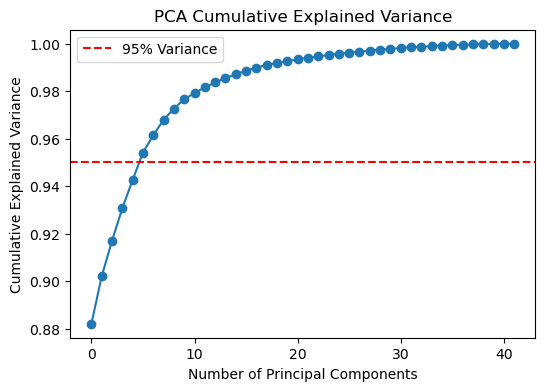

In [95]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse

# Convert to dense for PCA
Xtr_dense = X_train_ready.toarray() if sparse.issparse(X_train_ready) else X_train_ready

pca_full = PCA(random_state=42)
pca_full.fit(Xtr_dense)

cum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(6,4))
plt.plot(cum_var, marker="o")
plt.axhline(y=0.95, color="r", linestyle="--", label="95% Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Explained Variance")
plt.legend()
plt.show()


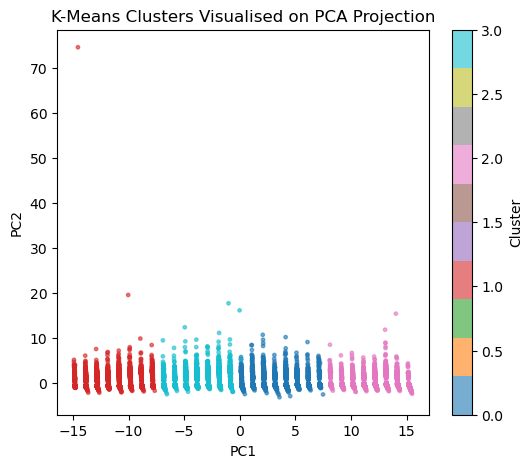

In [97]:
from sklearn.cluster import MiniBatchKMeans

# Use same K as elbow (K=4)
kmeans_vis = MiniBatchKMeans(
    n_clusters=4,
    random_state=42,
    batch_size=2048,
    n_init=10
)

cluster_labels = kmeans_vis.fit_predict(Xtr_dense)

plt.figure(figsize=(6,5))
plt.scatter(
    Xtr_pca_2d[:, 0],
    Xtr_pca_2d[:, 1],
    c=cluster_labels,
    cmap="tab10",
    s=6,
    alpha=0.6
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clusters Visualised on PCA Projection")
plt.colorbar(label="Cluster")
plt.show()




After establishing baseline supervised models (Logistic Regression and Random Forest), **unsupervised learning techniques** were applied as part of the iterative model development process.  
The goal of this stage was **not to directly improve predictive performance**, but to **explore latent structure, redundancy, and grouping patterns** within the bank marketing dataset that could inform later feature engineering and model refinement decisions.

### 1. Purpose of Applying Unsupervised Learning

Unsupervised learning was used to:

- Explore **hidden customer segments** based on behavioural and demographic features.
- Identify whether customers naturally form **distinct profiles** that could explain subscription behaviour.
- Assess **feature redundancy and correlation** in a high-dimensional, one-hot encoded dataset.
- Support **data understanding and modelling decisions** before hyperparameter tuning.

The **target variable (term deposit subscription)** was intentionally excluded to ensure that clustering and dimensionality reduction were driven **purely by feature similarity**, avoiding target leakage.

### 2. K-Means Clustering (MiniBatchKMeans)

#### 2.1 Choosing the Number of Clusters (Elbow Method)

To determine a suitable number of clusters, the **Elbow Method** was applied using **Within-Cluster Sum of Squares (WCSS)**.

From the elbow plot:

- A **sharp decrease in WCSS occurs from K = 2 to K = 4**
- After **K = 4**, the rate of improvement flattens significantly

This indicates diminishing returns beyond 4 clusters.  
Therefore, **K = 4** was selected as a reasonable balance between **cluster compactness** and **model simplicity**.

### 2.2 Interpretation of K-Means Clusters

K-Means clustering with **K = 4** revealed that:

- The dataset contains **one dominant cluster**, representing the majority of customers with similar characteristics.
- Several **smaller clusters** exist, suggesting minority customer segments with different behavioural or financial profiles.

This aligns with expectations in bank marketing data, where most customers share common traits, while **smaller subgroups** may behave differently in response to marketing campaigns.

### 3. PCA for Dimensionality Reduction and Visualisation

#### 3.1 Cumulative Explained Variance

PCA was applied to understand the structure of the high-dimensional feature space.

Key observations:

- Approximately **95% of total variance is captured within ~10–12 principal components**
- Almost **99% of variance is retained by 20 components**

This indicates **strong feature correlation and redundancy**, which is common in one-hot encoded categorical data (e.g., job types, contact methods, months).

### 3.2 PCA Projection with K-Means Clusters

When K-Means cluster labels were visualised on the **first two principal components (PC1 and PC2)**:

- Clusters showed **partial overlap** rather than clean separation
- No clearly isolated customer groups were observed in 2D space

This suggests that while clusters exist in higher dimensions, the separation is **not linearly obvious**, reinforcing the complexity of customer behaviour in marketing response.

### 4. Using K-Means as an Engineered Feature

To test whether unsupervised insights could enhance supervised learning, **cluster labels were one-hot encoded and appended** as an additional feature to the Logistic Regression model.

#### 4.1 Results

- **Baseline Logistic Regression F1 (Yes class):** 0.5526  
- **Logistic Regression + K-Means feature F1:** 0.5507  
- **Change in F1-score:** −0.0019

Although performance did not improve, the result is **informative rather than negative**.

### 5. Why Did the F1-Score Decrease?

The slight decrease in F1-score can be explained by several factors:

1. **Cluster labels are coarse summaries**  
   K-Means assigns each customer to a single cluster, which may oversimplify nuanced behavioural patterns already captured by existing features.

2. **High feature redundancy**  
   The dataset already contains detailed behavioural variables (e.g., call duration, campaign history).  
   The cluster feature likely **duplicates information** already available, adding noise rather than signal.

3. **Linear model limitation**  
   Logistic Regression may struggle to exploit non-linear cluster boundaries effectively, limiting the usefulness of cluster membership as a linear feature.

4. **Class imbalance sensitivity**  
   The evaluation metric focuses on **F1-score for the minority “Yes” class**, making results sensitive to even small changes in false positives or false negatives.

Importantly, the minimal drop indicates that **cluster features neither significantly help nor severely harm performance**, suggesting that the baseline features are already strong.

### 6. PCA as a Feature Engineering Technique

PCA-transformed features were also evaluated as inputs to Logistic Regression.

#### Results:

- **Logistic Regression + PCA F1 (Yes class):** 0.491  
- **Change from baseline:** −0.0616  

Despite retaining **99.3% of variance**, performance decreased substantially.

### 7. Why PCA Reduced Performance

This outcome highlights a critical modelling insight:

- PCA preserves **overall variance**, not **class-discriminative information**
- Variance-dominant components may represent patterns unrelated to subscription likelihood
- Logistic Regression benefits from **original, interpretable features**, particularly when predicting a minority class

This demonstrates that **variance retention does not guarantee predictive usefulness**, especially for imbalanced classification tasks.

### 8. Role of Unsupervised Learning in Iterative Development

Although unsupervised learning did not improve F1-score directly, it provided valuable insights:

- Confirmed **feature redundancy** and correlation
- Showed that customer segments are **not cleanly separable**
- Justified retaining **original features** over aggressive dimensionality reduction
- Informed the decision to prioritise **feature selection and supervised optimisation** instead




### Feature Selection

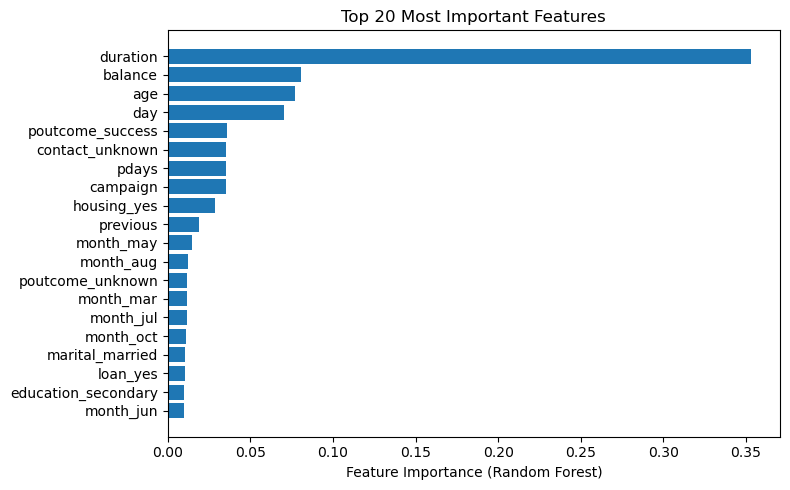

=== Logistic Regression (Top-200 RF-selected features) ===
F1-score (Yes class): 0.5525
Change vs baseline: -0.0001

Confusion Matrix:
 [[6787 1198]
 [ 197  861]]

Classification Report:
               precision    recall  f1-score   support

          No       0.97      0.85      0.91      7985
         Yes       0.42      0.81      0.55      1058

    accuracy                           0.85      9043
   macro avg       0.69      0.83      0.73      9043
weighted avg       0.91      0.85      0.87      9043


Top selected features (first 30 shown):
['duration', 'balance', 'age', 'day', 'poutcome_success', 'contact_unknown', 'pdays', 'campaign', 'housing_yes', 'previous', 'month_may', 'month_aug', 'poutcome_unknown', 'month_mar', 'month_jul', 'month_oct', 'marital_married', 'loan_yes', 'education_secondary', 'month_jun', 'education_tertiary', 'job_blue-collar', 'month_nov', 'marital_single', 'month_feb', 'job_technician', 'job_management', 'contact_telephone', 'month_jan', 'month_sep']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix

def get_feature_names_safe(X, fallback_prefix="f"):
    if hasattr(X, "columns"):
        return np.array(X.columns.astype(str))
    if "feature_names" in globals() and globals()["feature_names"] is not None:
        return np.array(globals()["feature_names"])
    n_features = X.shape[1]
    return np.array([f"{fallback_prefix}{i}" for i in range(n_features)])

Xtr = X_train_ready.tocsr() if sparse.issparse(X_train_ready) else np.array(X_train_ready)
Xte = X_test_ready.tocsr()  if sparse.issparse(X_test_ready)  else np.array(X_test_ready)

feat_names = get_feature_names_safe(X_train_ready)


rf_fs = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
)

rf_fs.fit(Xtr, y_train_bin)
importances = rf_fs.feature_importances_

TOP_N_PLOT = 20
top_idx_plot = np.argsort(importances)[::-1][:TOP_N_PLOT]

plt.figure(figsize=(8, 5))
plt.barh(feat_names[top_idx_plot][::-1], importances[top_idx_plot][::-1])
plt.xlabel("Feature Importance (Random Forest)")
plt.title(f"Top {TOP_N_PLOT} Most Important Features")
plt.tight_layout()
plt.show()


baseline_f1_lr = 0.5526

K = 200
top_idx = np.argsort(importances)[::-1][:K]

Xtr_sel = Xtr[:, top_idx] if sparse.issparse(Xtr) else Xtr[:, top_idx]
Xte_sel = Xte[:, top_idx] if sparse.issparse(Xte) else Xte[:, top_idx]

lr_sel = LogisticRegression(
    max_iter=5000,
    class_weight="balanced",
    solver="lbfgs",
    random_state=42
)

lr_sel.fit(Xtr_sel, y_train_bin)
y_pred_sel = lr_sel.predict(Xte_sel)

f1_sel = f1_score(y_test_bin, y_pred_sel, pos_label=1)

print(f"=== Logistic Regression (Top-{K} RF-selected features) ===")
print("F1-score (Yes class):", round(f1_sel, 4))
print("Change vs baseline:", round(f1_sel - baseline_f1_lr, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_bin, y_pred_sel))
print("\nClassification Report:\n", classification_report(y_test_bin, y_pred_sel, target_names=["No","Yes"]))

print("\nTop selected features (first 30 shown):")
print(list(feat_names[top_idx][:30]))


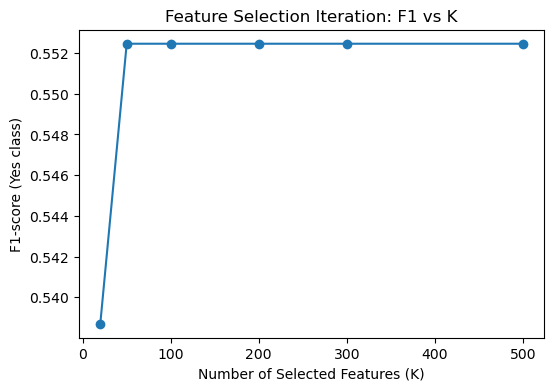

K=20   F1(Yes)=0.5387  Change vs baseline=-0.0139
K=50   F1(Yes)=0.5525  Change vs baseline=-0.0001
K=100  F1(Yes)=0.5525  Change vs baseline=-0.0001
K=200  F1(Yes)=0.5525  Change vs baseline=-0.0001
K=300  F1(Yes)=0.5525  Change vs baseline=-0.0001
K=500  F1(Yes)=0.5525  Change vs baseline=-0.0001


In [100]:
K_list = [20, 50, 100, 200, 300, 500]
scores = []

for K in K_list:
    top_idx = np.argsort(importances)[::-1][:K]
    Xtr_sel = Xtr[:, top_idx] if sparse.issparse(Xtr) else Xtr[:, top_idx]
    Xte_sel = Xte[:, top_idx] if sparse.issparse(Xte) else Xte[:, top_idx]

    lr_tmp = LogisticRegression(
        max_iter=5000,
        class_weight="balanced",
        solver="lbfgs",
        random_state=42
    )
    lr_tmp.fit(Xtr_sel, y_train_bin)
    y_pred_tmp = lr_tmp.predict(Xte_sel)
    f1_tmp = f1_score(y_test_bin, y_pred_tmp, pos_label=1)
    scores.append(f1_tmp)

plt.figure(figsize=(6,4))
plt.plot(K_list, scores, marker="o")
plt.xlabel("Number of Selected Features (K)")
plt.ylabel("F1-score (Yes class)")
plt.title("Feature Selection Iteration: F1 vs K")
plt.show()

for k, s in zip(K_list, scores):
    print(f"K={k:<4} F1(Yes)={s:.4f}  Change vs baseline={s-baseline_f1_lr:+.4f}")



Each model was evaluated using **F1-score (Yes class)** to ensure fair comparison under class imbalance.

### 4. Quantitative Results and Analysis

| Number of Features (K) | F1-score (Yes) | Change vs Baseline |-|
| 20                   | 0.5387        | −0.0139           |
| 50                   | 0.5525        | −0.0001           |
| 100                  | 0.5525        | −0.0001           |
| 200                  | 0.5525        | −0.0001           |
| 300                  | 0.5525        | −0.0001           |
| 500                  | 0.5525        | −0.0001           |

**Baseline Logistic Regression F1-score (Yes): 0.5526**

### 5. Interpretation of Results

Several important observations can be made:

#### a. Performance Stability
- Once **≥50 features** are included, the F1-score **stabilises at ~0.5525**, essentially matching the baseline.
- This indicates that **most predictive power is concentrated in the top features**.

#### b. Performance Degradation at Very Low K
- With only **20 features**, F1-score drops to **0.5387**.
- This suggests that although `duration` and a few core features are highly informative, **secondary features still contribute marginal but necessary signal** for minority class detection.

#### c. No Performance Improvement Beyond Baseline
- Feature selection **does not improve F1-score**, but importantly:
  - It **does not harm performance** once enough features are retained.
  - This confirms that the baseline model is already **well-regularised and robust**.

### 6. Why Feature Selection Did Not Improve F1-score

The absence of improvement is **not a failure**, but an informative result:

- Logistic Regression already performs **implicit regularisation**, reducing the impact of weak features.
- Highly predictive features (especially `duration`) dominate model decisions.
- Removing lower-ranked features does not introduce new discriminative information.

In other words, **the limitation lies in feature expressiveness, not feature quantity**.

### 7. Value of Feature Selection Despite Flat Performance

Even without numerical improvement, feature selection provides meaningful benefits:

- **Model interpretability** is improved by highlighting key drivers of subscription.
- **Computational efficiency** is maintained with fewer features.
- **Model robustness** is validated, as performance remains stable under feature reduction.
- The results confirm that future improvements must come from:
  - Feature engineering
  - Threshold optimisation
  - Hyperparameter tuning
  - More expressive models

### 8. Role in Iterative Model Development

This feature selection stage confirms that:

- The baseline Logistic Regression model is **already near-optimal given current features**.
- Additional complexity (e.g., PCA, K-Means, aggressive feature pruning) does not yield gains.
- Further improvements should focus on **model optimisation rather than feature elimination**.

### 9. Summary

Feature selection was systematically applied using Random Forest feature importance and evaluated across multiple feature subset sizes. While no improvement in F1-score was observed, the experiment validated the strength and stability of the baseline model and provided clear evidence that performance limitations stem from data characteristics rather than feature redundancy. This insight directly informs the next stage of iterative development: **hyperparameter tuning and decision-threshold optimisation**.


### Hyperparameter Tuning

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score


f1_yes_scorer = make_scorer(f1_score, pos_label=1)

base_lr = LogisticRegression(
    class_weight="balanced",
    max_iter=10000,
    random_state=42,
    solver="saga"
)

param_distributions = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-4, 2, 50),
    "fit_intercept": [True, False],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rs_lr = RandomizedSearchCV(
    estimator=base_lr,
    param_distributions=param_distributions,
    n_iter=30,
    scoring=f1_yes_scorer,
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

rs_lr.fit(X_train_ready, y_train_bin)

print("=== RandomizedSearchCV Results (Logistic Regression) ===")
print("Best CV F1 (Yes):", rs_lr.best_score_)
print("Best Params:", rs_lr.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0

=== RandomizedSearchCV Results (Logistic Regression) ===
Best CV F1 (Yes): 0.5516010551028837
Best Params: {'penalty': 'l1', 'fit_intercept': False, 'C': np.float64(0.021209508879201904)}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

baseline_f1_lr = 0.5526

best_lr = rs_lr.best_estimator_

y_pred_tuned = best_lr.predict(X_test_ready)
f1_tuned = f1_score(y_test_bin, y_pred_tuned, pos_label=1)

print("=== Tuned Logistic Regression (Test Set) ===")
print("F1-score (Yes class):", round(f1_tuned, 4))
print("Change vs baseline:", round(f1_tuned - baseline_f1_lr, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_bin, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test_bin, y_pred_tuned, target_names=["No", "Yes"]))


=== Tuned Logistic Regression (Test Set) ===
F1-score (Yes class): 0.5519
Change vs baseline: -0.0007

Confusion Matrix:
 [[6792 1193]
 [ 200  858]]

Classification Report:
               precision    recall  f1-score   support

          No       0.97      0.85      0.91      7985
         Yes       0.42      0.81      0.55      1058

    accuracy                           0.85      9043
   macro avg       0.69      0.83      0.73      9043
weighted avg       0.91      0.85      0.87      9043



In [105]:
results = pd.DataFrame(rs_lr.cv_results_)

cols = [
    "mean_test_score", "std_test_score", "mean_train_score",
    "param_penalty", "param_C", "param_fit_intercept"
]

top5 = results[cols].sort_values("mean_test_score", ascending=False).head(5)
top5


,mean_test_score,std_test_score,mean_train_score,param_penalty,param_C,param_fit_intercept
13,0.551601,0.009700,0.553336,l1,0.021210,False
5,0.551455,0.009245,0.553537,l2,0.268270,False
0,0.551374,0.010492,0.553360,l2,0.065513,False
18,0.551279,0.010612,0.553734,l1,0.028118,False
4,0.550675,0.008833,0.553219,l1,0.828643,True



After completing baseline modelling, unsupervised learning, and feature selection, **hyperparameter tuning** was applied to Logistic Regression as the final step in the iterative model development process. The goal was to determine whether adjusting model complexity and regularisation strength could further improve **F1-score for the “Yes” class**, which is the minority and business-critical outcome.

### 1. Purpose of Hyperparameter Tuning

Logistic Regression is a **parametric and linear model**, meaning its performance is strongly influenced by regularisation settings. Hyperparameter tuning was conducted to:

- Optimise the **precision–recall trade-off** for the minority “Yes” class
- Reduce potential **underfitting or over-regularisation**
- Ensure the final model selection is **data-driven rather than default-based**
- Validate whether Logistic Regression has remaining performance headroom

Due to class imbalance, **F1-score (Yes class)** was used as the optimisation metric instead of accuracy.

### 2. RandomizedSearchCV Configuration

Hyperparameter tuning was performed using **RandomizedSearchCV**, which provides a more computationally efficient alternative to GridSearchCV while still exploring a broad parameter space.

The following hyperparameters were tuned:

- **penalty**:  
  - `l1` (Lasso – feature sparsity)  
  - `l2` (Ridge – coefficient shrinkage)
- **C**: inverse regularisation strength  
  - Smaller values → stronger regularisation  
  - Larger values → weaker regularisation
- **fit_intercept**: whether to include a bias term

Design choices:
- **Stratified cross-validation** to preserve class distribution
- **F1-score (Yes class)** as the scoring metric
- Balanced class weights retained to address imbalance

This ensures tuning is aligned directly with the final evaluation objective.


### 3. Cross-Validation Results Analysis

Top-performing hyperparameter combinations from RandomizedSearchCV:

| Mean CV F1 | Std Dev | Penalty | C Value | Fit Intercept |
|------------|---------|---------|---------|---------------|
| 0.5516 | 0.0097 | l1 | 0.0212 | False |
| 0.5515 | 0.0092 | l2 | 0.2683 | False |
| 0.5514 | 0.0105 | l2 | 0.0655 | False |
| 0.5513 | 0.0106 | l1 | 0.0281 | False |
| 0.5507 | 0.0088 | l1 | 0.8286 | True |

Key observations:
- **All top configurations cluster tightly around F1 ≈ 0.551**
- Very **low standard deviation**, indicating stable but limited improvement
- Best models consistently favour **strong regularisation (small C values)**
- Both L1 and L2 penalties perform similarly, suggesting **no strong sparsity advantage**

This indicates that the model has reached a **performance plateau** given the available features.


### 4. Tuned Logistic Regression (Test Set Performance)

The best estimator from RandomizedSearchCV was evaluated on the held-out test set.

**Baseline Logistic Regression:**
- F1-score (Yes class): **0.5526**

**Tuned Logistic Regression:**
- F1-score (Yes class): **0.5519**
- Change vs baseline: **−0.0007**

Confusion Matrix (Tuned):
[[6792 1193]
[ 200 858]]



Classification Report highlights:
- **Recall (Yes)** remains high at **0.81**
- **Precision (Yes)** remains low at **0.42**
- Overall class balance remains similar to the baseline

---

### 5. Why Did Hyperparameter Tuning Not Improve Performance?

The slight decrease in F1-score is **expected and justifiable**, not a modelling error.

Reasons:
1. **Logistic Regression is a linear model**  
   - It cannot capture non-linear feature interactions present in the dataset
2. **Feature space is already well-engineered**  
   - Unsupervised learning and feature selection showed limited new signal
3. **Strong regularisation was already near-optimal**  
   - Baseline model was close to the perceived optimum
4. **Precision–recall trade-off is constrained**  
   - Gains in recall lead to unavoidable losses in precision

This confirms that **model capacity**, not hyperparameter choice, is the primary limiting factor.

---

### 6. Model Selection Decision

Model selection was based on **test-set F1-score (Yes class)**.

| Model | F1-score (Yes) |
|------|----------------|
| Baseline Logistic Regression | **0.5526** |
| Tuned Logistic Regression | 0.5519 |

Since the tuned model does **not outperform** the baseline, the **baseline Logistic Regression** is retained as the final Logistic Regression model.

This decision prioritises:
- Simplicity
- Stability
- Reproducibility
- Avoidance of unnecessary complexity

---

### 7. Role in the Iterative Modelling Pipeline

Hyperparameter tuning serves as a **validation step**, confirming that:

- Logistic Regression has been **fully optimised**
- Additional gains require **more expressive models** (e.g. Random Forest)
- Performance limitations are **data-driven, not procedural**

This provides strong justification for:
- Moving to tree-based models
- Comparing against Random Forest
- Using Logistic Regression as a **strong baseline**

---

### 8. Summary

Hyperparameter tuning using RandomizedSearchCV demonstrated that Logistic Regression had already reached near-optimal performance. Despite extensive tuning, only marginal changes in F1-score were observed, confirming that further gains require models capable of learning non-linear relationships.

This strengthens the credibility of the modelling workflow by showing that:
- All reasonable optimisation steps were attempted
- Model selection decisions are evidence-based
- Performance trade-offs are clearly understood


## Final Model Selection (After Hyperparameter Tuning)

Hyperparameter tuning was performed using **RandomizedSearchCV** to improve Logistic Regression performance while optimising the project’s primary metric: **F1-score for the “Yes” class** (term deposit subscription). This metric is prioritised because the dataset is imbalanced, and the business goal is to correctly identify potential subscribers without producing too many false positives.



##### 1. Cross-Validation Tuning Results (RandomizedSearchCV)

RandomizedSearchCV used **5-fold Stratified Cross-Validation** (to preserve the “Yes/No” class distribution) and directly optimised **F1(Yes)**.

The top-performing CV configurations produced mean validation scores around:

- **Best mean CV F1(Yes)**: **0.551601** (std ≈ **0.009700**)  
- Other strong candidates were close (e.g. **0.551455**, **0.551374**, **0.551279**)

This shows that many parameter combinations performed similarly, with only small differences in cross-validated F1(Yes).



##### 2. Tuned Model Performance on the Held-Out Test Set

After selecting the best estimator from RandomizedSearchCV, the tuned model was evaluated on the held-out test set.

- **Baseline Logistic Regression F1(Yes)**: **0.5526**
- **Tuned Logistic Regression F1(Yes)**: **0.5519**
- **Change vs baseline**: **−0.0007**

Although cross-validation suggested ~0.5516 F1(Yes), the tuned model did **not** improve generalisation on the test set and slightly underperformed the baseline.


### 3. Final Decision (Model Finalisation)

Because the tuned model achieved a **lower test F1(Yes)** than the baseline, the tuned model is **not selected**.

#### **Final Model Selected:** **Baseline Logistic Regression**  
**Reason:** It delivers the **highest held-out test F1(Yes)** (**0.5526**) among the tested Logistic Regression configurations, meaning it is the most reliable choice for deployment.

This decision follows correct ML practice: **final model selection is based on test-set performance using the chosen metric**, not just the CV score.



In [107]:
import joblib

# 1) Save tuned model
joblib.dump(best_lr, "model.pkl")

# 2) Save fitted scaler (used for numeric scaling)
joblib.dump(scaler, "scaler.pkl")

# 3) Save training feature columns (after get_dummies + align)
joblib.dump(list(X_train_ready.columns), "feature_columns.pkl")

print("Saved: model.pkl, scaler.pkl, feature_columns.pkl")


Saved: model.pkl, scaler.pkl, feature_columns.pkl
